In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tqdm.notebook import tqdm
from time import sleep

In [2]:
def euclideanDistance(t1,q1,t2,q2):
    return np.sqrt((t2-t1)**2 + (q2-q1)**2)

def HoughEllipse(imgpath,mindist=10,minv=10,ellipses=1):
    #ELLIPSES=[]
    img = cv2.imread(imgpath,0)
    height, width= np.shape(img)
    allelipses=[]
    #print(height,width)
    #pixels=np.transpose(np.where(img>0))
    pixels=[]
    
    for i in range(width):
        for j in range(height):
            if img[j][i] >1:
                pixels.append([i,j])
    print(len(pixels))
    acc=np.zeros(int(np.around(max(width, height)/2)))
    acc=acc*0
    #xs=np.transpose(pixels)[0]
    #ys=np.transpose(pixels)[1]
    #print(len(xs),len(pixels),height*width)
    #xs,ys=np.transpose(edges)[0],np.transpose(edges)[1]
    #print(xs)
    #print(img[98][15])
    for ij1 in range(len(pixels)):
        for ij2 in range(len(pixels)-1,-1,-1):
            #print(ij1)
            x1=pixels[ij1][0]
            y1=pixels[ij1][1]
            #print(x1,y1)
            x2=pixels[ij2][0]
            y2=pixels[ij2][1]
            #print(x2,y2)
            #print(acc)
            d12=euclideanDistance(x1,y1,x2,y2)
            
            acc=acc*0
            
            if x2-x1>mindist and d12 > mindist:
                x0,y0= (x1+x2)/2,(y1+y2)/2
                alph=np.arctan((y2-y1)/(x2-x1))*180/np.pi
                a=d12/2
                d01=euclideanDistance(x1,y1,x0,y0)
                d02=euclideanDistance(x1,y1,x0,y0)
                for ij3 in range(len(pixels)):
                    if ij3==ij1  and ij3==ij2:
                        continue
                    x3=pixels[ij3][0]
                    y3=pixels[ij3][1]
                    d03 = euclideanDistance(x3,y3,x0,y0)
                    
                    if d03>=a or d03<mindist:
                        continue
                        
                    f=euclideanDistance(x2,y2,x3,y3)
                    
                    cosine2T= ( (a**2 + d03**2 - f**2 ) / ( 2 * a * d03 ) )**2
                    #print(a,d03,f,cosine2T)
                    sin2T=1-cosine2T
                    #if cosine2T>1:
                    #    cosine2T=0.9999999999999
                    #if sin2T>1:
                    #    sin2T=0.9999999999999
                    if ( a**2 - d03**2 * cosine2T)<=0:
                        continue
                    b= np.around(np.sqrt(( a**2 * d03**2 * sin2T)/( a**2 - d03**2 * cosine2T)))
                    #print(b)
                    if b > 0 and b < len(acc) and b>mindist:
                        acc[int(b)]+=1
                        #print(acc)
                sv,si=max(acc),list(acc).index(max(acc))
                if sv>=minv:
                    params= [x0,y0,a*2,si*2,alph]
                    #ELLIPSES.append(params)
                    return params
        #tqdm.write("done one pixel")
        
    return -1
    

In [3]:
HoughEllipse("ellipsetilted.png",20,140)

1488


<ipython-input-2-fe8fbe4ff837>:67: RuntimeWarning: invalid value encountered in sqrt
  b= np.around(np.sqrt(( a**2 * d03**2 * sin2T)/( a**2 - d03**2 * cosine2T)))


[124.0, 140.0, 308.6227470553653, 106, 42.37359436170925]

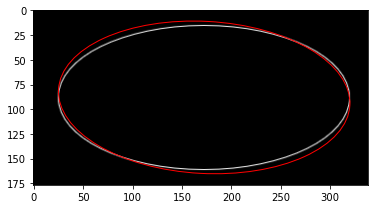

In [4]:
errr=[172.5, 88.0, 76.38880808076534, 73, 1.2718161632920642]
[176.0, 87.5, 77.0211010048545, 76, 1.2264623434555089]
[189.0, 85.0, 80.1311425102625, 56, 1.0624857017840694]
[172.5, 88.0, 76.38880808076534, 113, 1.2718161632920642]
[172.5, 88.0, 295.4335796757031, 72, 3.104525909264347]
[85.0, 189.0, 80.1311425102625, 56, 0.5083106250108272]
import matplotlib.patches as patches
from PIL import Image

im = np.array(Image.open('testellipse2.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a patch
ell = patches.Ellipse(xy=(172.5,88.0), width= 295.4335796757031, height=154,angle=3.104525909264347, linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(ell)

plt.show()


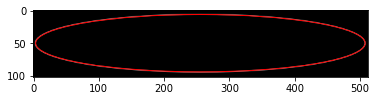

In [5]:
err2=[245.0, 50.0, 60.8276253029822, 43, 0.8086497862079113]
err3=[255.5, 50.0, 68.5, 18, 0.697542007167814]
[245.0, 50.0, 60.8276253029822, 43, 0.8086497862079113]
[255.5, 50.0, 505.03564230656036, 44, 0.68070990574743]
[228.5, 6.0, 25.5, 88, 0.0]

im = np.array(Image.open('testellipse3.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a patch
ell = patches.Ellipse(xy=(255.5,  50.0), width=505.03564230656036, height=88,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(ell)

plt.show()

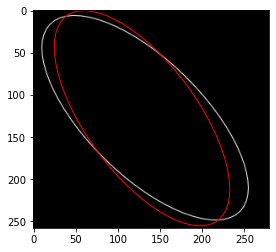

In [6]:
err4=[128.5, 127.5, 150.9055996310276, 66, 0.9359099816886528]

im = np.array(Image.open('ellipsetilted.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a patch
ell = patches.Ellipse(xy=(128.5, 127.5), width=150.9055996310276*2, height=66*2,angle=0.9359099816886528*180/np.pi,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(ell)

plt.show()

# BENDITA SEA ESTA CELDA


def euclideanDistance(t1,q1,t2,q2):
    return np.sqrt((t2-t1)**2 + (q2-q1)**2)

def HoughEllipse(imgpath,mindist=10,minv=10):
    img = cv2.imread(imgpath,0)
    height, width= np.shape(img)
    allelipses=[]
    #print(height,width)
    #pixels=np.transpose(np.where(img>0))
    pixels=[]
    for i in range(width):
        for j in range(height):
            if img[j][i] >1:
                pixels.append([i,j])
    #print(pixels)
    acc=np.zeros(int(np.around(max(width, height)/2)))
    acc=acc*0
    #xs=np.transpose(pixels)[0]
    #ys=np.transpose(pixels)[1]
    #print(len(xs),len(pixels),height*width)
    #xs,ys=np.transpose(edges)[0],np.transpose(edges)[1]
    #print(xs)
    #print(img[98][15])
    for ij1 in range(len(pixels)):
        for ij2 in range(len(pixels)-1,-1,-1):
            x1=pixels[ij1][0]
            y1=pixels[ij1][1]
            #print(x1,y1)
            x2=pixels[ij2][0]
            y2=pixels[ij2][1]
            #print(x2,y2)
            #print(acc)
            d12=euclideanDistance(x1,y1,x2,y2)
            
            acc=acc*0
            
            if x2-x1>mindist and d12 > mindist:
                x0,y0= (x1+x2)/2,(y1+y2)/2
                alph=np.arctan((y2-y1)/(x2-x1))*180/np.pi
                a=d12/2
                d01=euclideanDistance(x1,y1,x0,y0)
                d02=euclideanDistance(x1,y1,x0,y0)
                for ij3 in range(len(pixels)):
                    if ij3==ij1  and ij3==ij2:
                        continue
                    x3=pixels[ij3][0]
                    y3=pixels[ij3][1]
                    d03 = euclideanDistance(x3,y3,x0,y0)
                    
                    if d03>=a:
                        continue
                        
                    f=euclideanDistance(x2,y2,x3,y3)
                    
                    cosine2T= ( (a**2 + d03**2 - f**2 ) / ( 2 * a * d03 ) )**2
                    #print(a,d03,f,cosine2T)
                    sin2T=1-cosine2T
                    if ( a**2 - d03**2 * cosine2T)<=0:
                        continue
                    b= np.around(np.sqrt(( a**2 * d03**2 * sin2T)/( a**2 - d03**2 * cosine2T)))
                    #print(b)
                    if b > 0 and b < len(acc):
                        acc[int(b)]+=1
                        #print(acc)
                sv,si=max(acc),list(acc).index(max(acc))
                if sv>=minv:
                    params= [x0,y0,a*2,si*2,alph]
                        #allelipses.append(params)
                #if len(allelipses)>minsel:
                    return params
    return -1

In [7]:
def detectEllipses(path,mindist,minvotes):
    detected=HoughEllipse(path,mindist,minvotes)
    im = np.array(Image.open(path), dtype=np.uint8)
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    ell = patches.Ellipse(xy=(detected[0], detected[1]),
                          width=detected[2],
                          height=detected[3],
                          angle=detected[4],
                          linewidth=4,
                          edgecolor='r',
                          facecolor='none',
                          alpha=0.6)
    ax.add_patch(ell)
    plt.show()
        

2357


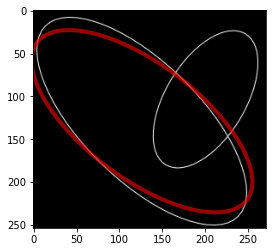

In [8]:
detectEllipses("multiellipse.png",10,40)

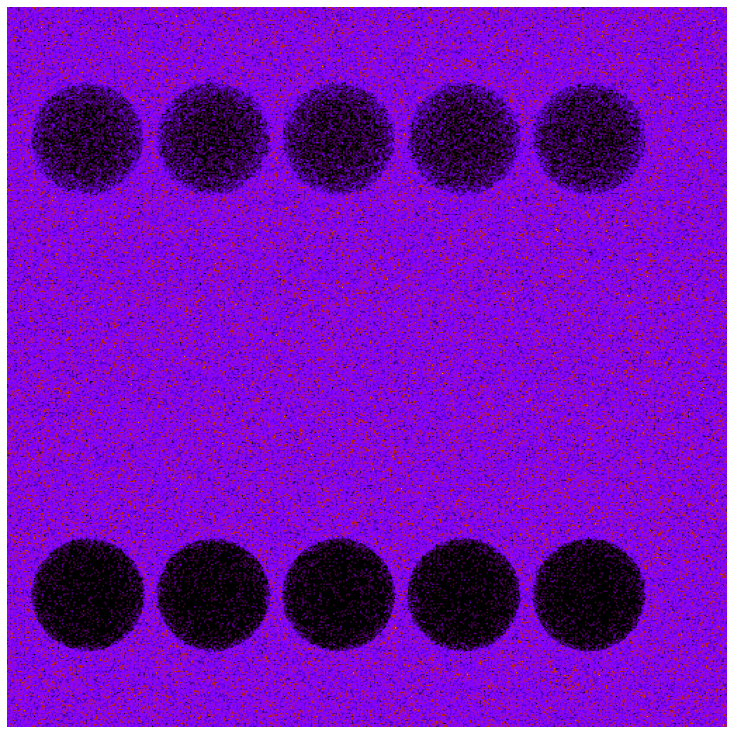

In [9]:
ct_scans= sitk.GetArrayFromImage(sitk.ReadImage('aten/Dosis-Dose.mhd',sitk.sitkFloat32))
dosis=ct_scans[0]

fig=plt.figure(figsize=(10,10),frameon=False)


ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dosis,cmap='gnuplot')
#plt.colorbar()
fig.savefig("dosis.png")

In [10]:
figtoprocess=cv2.imread('dosis.png',0)
#print(figtoprocess)
#edges = cv2.Canny(figtoprocess,100,200)

#plt.subplot(121),plt.imshow(figtoprocess,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [11]:
def negative(fig):
    newfig=np.zeros(np.shape(fig))
    maxint=np.max(fig)
    for i in range(len(fig)):
        for j in range(len(fig[i])):
            newfig[i][j]=255-fig[i][j]*255/maxint
    return newfig

def smooth(fig,fact=25):
    kernel = np.ones((5,5),np.float32)/fact
    dst=cv2.filter2D(fig,-1,kernel)
    return dst

def subdivide(fig,intensity):
    newfig=np.zeros(np.shape(fig))
    #print(fig)
    for i in range(len(fig)):
        for j in range(len(fig[i])):
            if fig[i][j] <= intensity:
                newfig[i][j]=0
            if fig[i][j] > intensity and fig[i][j] < intensity:
                newfig[i][j]=intensity
            if fig[i][j] > intensity+30:
                newfig[i][j]=intensity+30
    return newfig

def threshold(fig,intensity):
    newfig=np.zeros(np.shape(fig))
    #print(fig)
    for i in range(len(fig)):
        for j in range(len(fig[i])):
            if fig[i][j] <= intensity:
                newfig[i][j]=0
            if fig[i][j] > intensity:
                newfig[i][j]=intensity
    return newfig

254.99999430030584


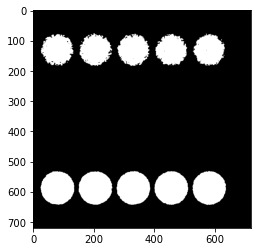

In [12]:
neg=negative(figtoprocess)
smoothed=smooth(neg)
thld=threshold(smoothed,200)
#print(smoothed)
print(np.max(smoothed))
plt.imshow(thld,cmap = 'gray')


In [13]:
def edges(img):
    slice1Copy = np.uint8(img)
    #edgearray=np.zeros(np.shape(img))
    edgesret = cv2.Canny(np.asarray(slice1Copy),100,200)
    #plt.imshow(edgesret,cmap = 'gray')
    return edgesret

edg=edges(thld)


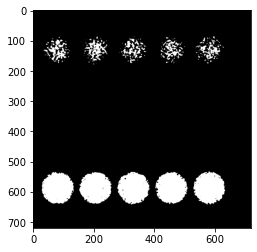

In [14]:
plt.imshow(subdivide(smoothed,200),cmap = 'gray')
        

In [15]:
def sectionize(img):
    array=[]
    x,y=np.shape(img)
    print(x,y)
    i=120
    while i < x+1:
        column=np.transpose(img[i-120:i:1])
        j=120
        i=i+120
        while j<y+1:
            section=np.transpose(column[j-120:j:1])
            array.append(section)
            j=j+120
    return array

result=sectionize(edg)


720 720


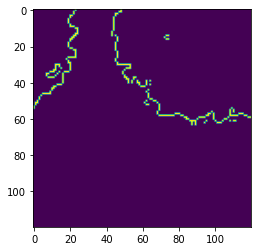

In [16]:
plt.imshow(result[9])

In [17]:
def HoughEllipse2(img,mindist=10,minv=10,ellipses=1):
    #ELLIPSES=[]
    #img = cv2.imread(imgpath,0)
    height,width= np.shape(img)
    allelipses=[]
    #print(height,width)
    #pixels=np.transpose(np.where(img>0))
    pixels=[]
    
    for i in range(width):
        for j in range(height):
            if img[j][i] >1:
                pixels.append([i,j])
    print(len(pixels))
    acc=np.zeros(int(np.around(max(width, height)/2)))
    acc=acc*0
    #xs=np.transpose(pixels)[0]
    #ys=np.transpose(pixels)[1]
    #print(len(xs),len(pixels),height*width)
    #xs,ys=np.transpose(edges)[0],np.transpose(edges)[1]
    #print(xs)
    #print(img[98][15])
    for ij1 in range(len(pixels)):
        for ij2 in range(len(pixels)-1,-1,-1):
            #print(ij1)
            x1=pixels[ij1][0]
            y1=pixels[ij1][1]
            #print(x1,y1)
            x2=pixels[ij2][0]
            y2=pixels[ij2][1]
            #print(x2,y2)
            #print(acc)
            d12=euclideanDistance(x1,y1,x2,y2)
            
            acc=acc*0
            
            if x2-x1>mindist and d12 > mindist:
                x0,y0= (x1+x2)/2,(y1+y2)/2
                alph=np.arctan((y2-y1)/(x2-x1))*180/np.pi
                a=d12/2
                d01=euclideanDistance(x1,y1,x0,y0)
                d02=euclideanDistance(x1,y1,x0,y0)
                for ij3 in range(len(pixels)):
                    if ij3==ij1  and ij3==ij2:
                        continue
                    x3=pixels[ij3][0]
                    y3=pixels[ij3][1]
                    d03 = euclideanDistance(x3,y3,x0,y0)
                    
                    if d03>=a or d03<mindist:
                        continue
                        
                    f=euclideanDistance(x2,y2,x3,y3)
                    
                    cosine2T= ( (a**2 + d03**2 - f**2 ) / ( 2 * a * d03 ) )**2
                    #print(a,d03,f,cosine2T)
                    sin2T=1-cosine2T
                    #if cosine2T>1:
                    #    cosine2T=0.9999999999999
                    #if sin2T>1:
                    #    sin2T=0.9999999999999
                    if ( a**2 - d03**2 * cosine2T)<=0:
                        continue
                    b= np.around(np.sqrt(( a**2 * d03**2 * sin2T)/( a**2 - d03**2 * cosine2T)))
                    #print(b)
                    if b > 0 and b < len(acc) and b>mindist:
                        acc[int(b)]+=1
                        #print(acc)
                sv,si=max(acc),list(acc).index(max(acc))
                if sv>=minv:
                    params= [x0,y0,a*2,si*2,alph]
                    #ELLIPSES.append(params)
                    return params
        
    return -1
    

In [18]:
HoughEllipse2(result[9])

271


[56.0, 55.5, 112.11155159036913, 34, 2.5561500785782822]

In [19]:
def detectEllipses2(path,mindist,minvotes):
    detected=HoughEllipse2(path,mindist,minvotes)
    im = path
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    ell = patches.Ellipse(xy=(detected[0], detected[1]),
                          width=detected[2],
                          height=detected[3],
                          angle=detected[4],
                          linewidth=4,
                          edgecolor='r',
                          facecolor='none',
                          alpha=0.6)
    ax.add_patch(ell)
    plt.show()

720 720
196


<ipython-input-17-8998a45e1f3d>:64: RuntimeWarning: invalid value encountered in sqrt
  b= np.around(np.sqrt(( a**2 * d03**2 * sin2T)/( a**2 - d03**2 * cosine2T)))


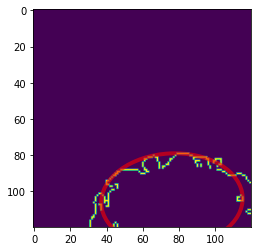

In [20]:
result=sectionize(edg)

detectEllipses2(result[0],25,25)

In [451]:
import cv2

import SimpleITK as sitk

#img = cv2.imread('test.png',0)
#img = cv2.medianBlur(img,5)


def circlemodel(inp,raw,prop=1.6,k=20,p1=50,p2=28,minrad=2,maxrad=40):
    img = np.copy(inp)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    craw = cv2.cvtColor(np.uint8(raw),cv2.COLOR_GRAY2BGR)

    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,prop,k,
                            param1=p1,param2=p2,minRadius=minrad,maxRadius=maxrad)
    print(circles)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
    # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(craw,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        cv2.circle(craw,(i[0],i[1]),2,(0,0,255),3)
        
    CimgS = cv2.resize(cimg, (1260, 540)) 
    CrawS = cv2.resize(craw, (1260, 540))
    imgS = cv2.resize(img, (1260, 540))  
    cv2.imshow('detected circles',cimg)
    cv2.imshow('original circles',craw)
    cv2.imshow('preprocess circles',img)
    cv2.waitKey(0)
    plt.figure(figsize=(14,9))
    plt.imshow(cimg,cmap="gray")
    return circles


In [22]:
#circlemodel(edg,maxrad=70)

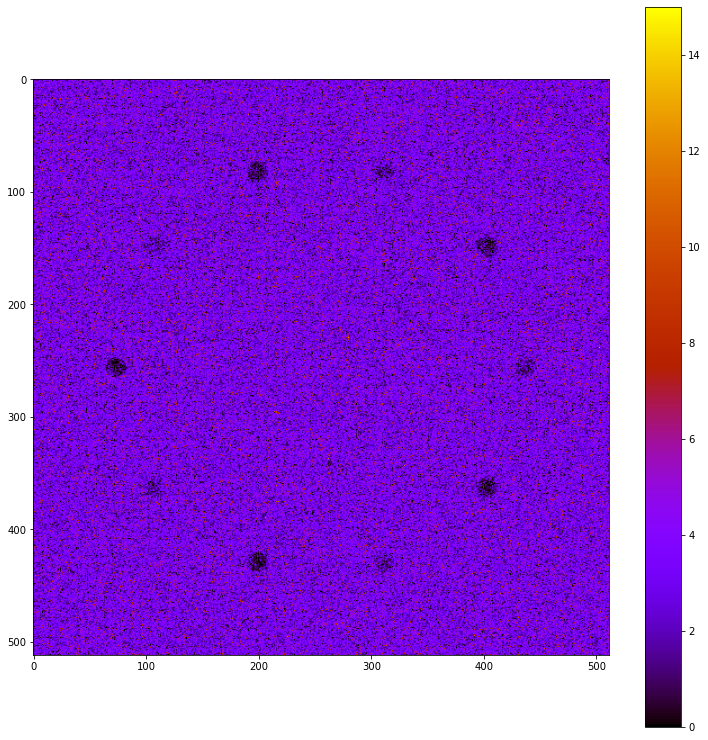

In [23]:
ct_scans2= sitk.GetArrayFromImage(sitk.ReadImage('240/Dosis-NbOfHits.mhd',sitk.sitkFloat32))
dosis2=ct_scans2[0]

fig=plt.figure(figsize=(10,10),frameon=False)


ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dosis2,cmap='gnuplot')
plt.colorbar()
#fig.savefig("240/dosis240.png")

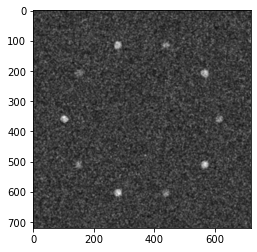

In [24]:
figtoprocess240=cv2.imread("240/dosis240.png",0)
#print(figtoprocess240)
neg240=negative(figtoprocess240)
smoothed240=smooth(neg240)
thld240=threshold(smoothed240,100)
#print(smoothed)
#print(np.max(smoothed240))
#plt.imshow(thld240,cmap = 'gray')
#print(thld240[200])
sbd240=subdivide(smoothed240,20)

plt.imshow(smoothed240,cmap = 'gray')

In [25]:
def recolor(img,param1=4,longs=1):
    newfig=np.copy(img)
    width,height= np.shape(newfig)
    print(height,width)
    for i in range(longs,width-longs):
        for j in range(longs,height-longs):
            if newfig[i][j]>100:
                        counter=0
                        for k in range(longs): 
                            if newfig[i+k][j]>100:
                                counter+=1
                            if newfig[i+k][j+k]>100:
                                counter+=1
                            if newfig[i+k][j-k]>100:
                                counter+=1
                            if newfig[i][j+k]>100:
                                counter+=1
                            if newfig[i][j-k]>100:
                                counter+=1
                            if newfig[i-k][j]>100:
                                counter+=1
                            if newfig[i-k][j+k]>100:
                                counter+=1
                            if newfig[i-k][j-k]>100:
                                counter+=1
                        #print(counter)
                        if counter<param1:
                            newfig[i][j]=0
                        else:
                            tile=np.random.randint(-longs,longs)
                            #print(tile)
                            newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j+tile]=200
                            #newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j-tile]=200
                            
                            
                            
    return newfig

In [29]:
def reiter(fig,n):
    newfig=np.copy(fig)
    for i in range(n):
        newfig=recolor(newfig,32,7)
    return newfig
        

result=reiter(thld240,1)





720 720


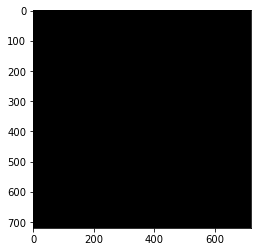

In [30]:
plt.imshow(edges(result),cmap = 'gray')

In [31]:
#circs=circlemodel(edges(result),figtoprocess240)

In [32]:
def draw(img,circles):
    width,height=np.shape(img)
    newfig=np.zeros(np.shape(img),dtype=np.uint8)
    fig=plt.figure(figsize=(10,10),frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.imshow(newfig,cmap = 'gray')
    for i in range(len(circles)):
        ell = patches.Circle(xy=(circles[i][0], circles[i][1]),radius=circles[i][2],edgecolor='white',facecolor='white',alpha=1)
        ax.add_patch(ell)
    ax.set_axis_off()
    fig.add_axes(ax)
    #plt.colorbar()
    fig.savefig("240/reading240.png")
    plt.show()

In [33]:
#draw(edges(result),circs[0])

In [34]:
#print(circs[0])

In [35]:
def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')
    if ((x2 - x1) * (y2 - y1) + 0.0) ==0:
        return 0
    else:
        return (q11 * (x2 - x) * (y2 - y) +
                q21 * (x - x1) * (y2 - y) +
                q12 * (x2 - x) * (y - y1) +
                q22 * (x - x1) * (y - y1)
               ) / ((x2 - x1) * (y2 - y1) + 0.0)

In [36]:
def interpolate(img,n):
    zz=cv2.imread(img,0)
    newfig=np.zeros(np.shape(zz))
    print(np.shape(zz),np.shape(newfig))
    height,width= np.shape(zz)
    for i in range(n,height-n):
        for j in range(n,height-n):
            for k in range(n):
                q11=(i-k,j-k,zz[i-k][j-k])
                q12=(i-k,j+k,zz[i-k][j+k])
                q21=(i+k,j-k,zz[i+k][j-k])
                q22=(i+k,j+k,zz[i+k][j+k])
                result= bilinear_interpolation(i, j, [q11,q12,q21,q22])
            newfig[i][j]=result
    return newfig

In [37]:
figtoprocess240b=cv2.imread("240/dosis240.png",0)
neg240b=negative(figtoprocess240b)
smoothed240p=smooth(neg240b)


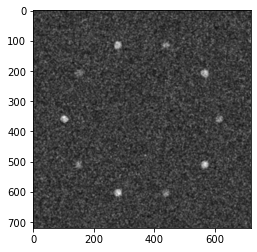

In [38]:
plt.imshow(smoothed240p,cmap = 'gray')

In [39]:
import scipy.interpolate as si
from numpy.polynomial.polynomial import Polynomial

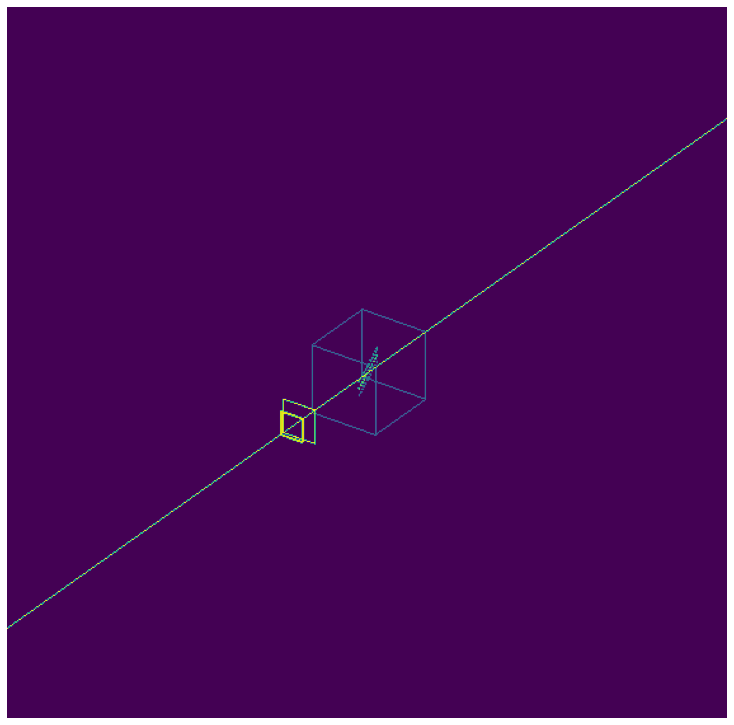

In [40]:
gate=cv2.imread("mod.png",0)

fig=plt.figure(figsize=(10,10),frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(gate)


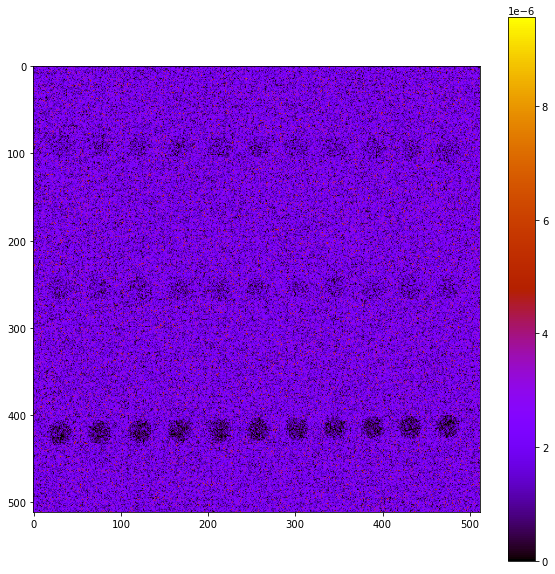

In [41]:
ct_scans3= sitk.GetArrayFromImage(sitk.ReadImage('depth\Dosis-Dose.mhd',sitk.sitkFloat32))
dosis3=ct_scans3[0]

fig=plt.figure(figsize=(10,10),frameon=False)


ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
#fig.add_axes(ax)
plt.imshow(dosis3,cmap='gnuplot')
plt.colorbar()
#fig.savefig("depth/dosisdepth.png")

In [42]:
depths=cv2.imread("depth/dosisdepth.png",0)
#print(figtoprocess240)
depthneg=negative(depths)
depthsmoothed=smooth(depthneg)
depththld=threshold(depthsmoothed,200)
#print(smoothed)
#print(np.max(smoothed240))
#plt.imshow(depththld,cmap = 'gray')
#print(thld240[200])
resultdepth=reiter(depththld,5)


720 720
720 720
720 720
720 720
720 720


200.0


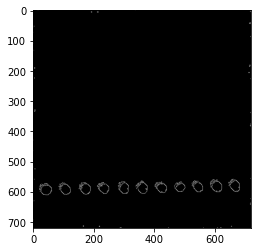

In [43]:
plt.imshow(edges(resultdepth),cmap = 'gray')
print(np.max(resultdepth))

In [44]:
def integral(fig):
    height, width= np.shape(fig)
    rows=[]
    for i in range(len(fig)):
        wholrow=np.sum(fig[i])
        #print(wholrow)
        rows.append(wholrow)
    mean=np.sum(rows)/(height*width)
    return mean

def get_mic_int(fig,n,circles):
    intens=[]
    for i in circles:
        dots=[]
        x,y,r=i[0],i[1],i[2]
        rad=int(i[2])
        #print(x,y)
        for k in range(-n,n+1):
            for l in range(-n,n+1):
                q11=[x+l,y+k]
                #print(k,l)
                #q12=[x-k,y+l]
                #print(q11)
                dots.append(fig[q11[1]][q11[0]])
                #dots.append(fig[q12[0]][q12[1]])
                #dots.append(fig[q21[0]][q21[1]])
                #dots.append(fig[q22[0]][q22[1]])
        mean=np.sum(dots)/len(dots)
        intens.append([x,y,r,mean])
    return np.asarray(intens)


def trilinear(fig,dots):
    newdot=dots
    print(newdot)
    #newdot.append([720,720,integral(fig)])
    #newdot.append([720,0,integral(fig)])
    #newdot.append([0,720,integral(fig)])
    #newdot.append([0,0,integral(fig)])
    x,y,z=np.transpose(dots)[0],np.transpose(dots)[1],np.transpose(dots)[3]+integral(fig)
    print(len(x),len(y),len(z))
    rang=np.linspace(min(x),max(x))
    dom=np.linspace(min(y),max(y))
    X,Y=np.meshgrid(rang,dom)
    interp=si.LinearNDInterpolator(list(zip(x, y)), z)
    Z = interp(X, Y)
    plt.pcolormesh(X,Y,Z,shading="auto")
    plt.plot(x, y, "ok", label="input point",)
    plt.legend()
    plt.colorbar()
    plt.axis("equal")
    plt.ylim(np.max(y)+20,np.min(y)-20)
    


In [45]:
#print(circs[0])
wok=get_mic_int(smoothed240p,1,circs[0])
#print(integral(smoothed240p))
trilinear(smoothed240p,wok)
print(wok)

NameError: name 'circs' is not defined

In [46]:
circsdepth=circlemodel(edges(resultdepth),depths ,prop=1.6,k=30,p1=50,p2=40,minrad=2,maxrad=70)

[[[173.6      589.60004   17.04    ]
  [ 42.4      592.8       16.080002]
  [357.6      586.4       18.32    ]
  [600.8      584.8       22.960001]
  [229.6      589.60004   19.92    ]
  [485.6      581.60004   16.24    ]
  [424.80002  586.4       15.280001]
  [661.60004  581.60004   20.560001]
  [544.8      584.8       13.68    ]
  [301.6      589.60004   13.84    ]
  [104.8      589.60004   19.28    ]]]


In [47]:
format2=get_mic_int(depthneg,1,circsdepth[0])

[[174.         590.          17.         205.41666667]
 [ 42.         593.          16.         194.79166667]
 [358.         586.          18.         237.00833333]
 [601.         585.          23.         205.84166667]
 [230.         590.          20.         186.00833333]
 [486.         582.          16.         226.525     ]
 [425.         586.          15.         212.925     ]
 [662.         582.          21.         196.20833333]
 [545.         585.          14.         207.25833333]
 [302.         590.          14.         213.06666667]
 [105.         590.          19.         210.8       ]]
11 11 11


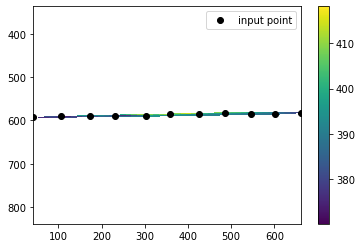

In [48]:
trilinear(depthsmoothed,format2)

In [49]:
print(circs)

NameError: name 'circs' is not defined

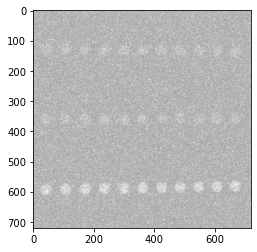

In [50]:
depthneg=negative(depths)
plt.imshow(depthneg,cmap = 'gray')

In [51]:
bmp=cv2.imread("ImagenesHUSIDavidJurado/06b. UAP #1,2 - uCs 1 y 2 - Manual Settings - F1_Gen2_VL.bmp",0)

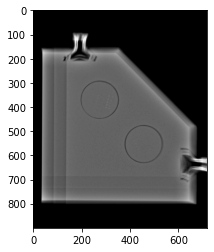

In [52]:
plt.imshow(bmp[1200:2100:1,0:720],"gray")

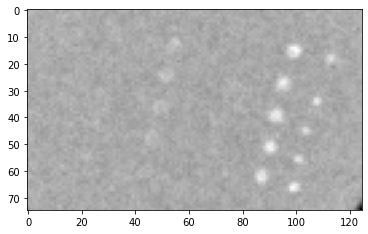

In [53]:
plt.imshow(bmp[1540:1615,215:340],"gray")
crop1=bmp[1540:1615,215:340]

def process(img, intensity):
    newneg=negative(img)
    newsmoothed=smooth(img)
    newthld=threshold(newsmoothed,intensity)
    newedges=edges(newthld)
    return newedges



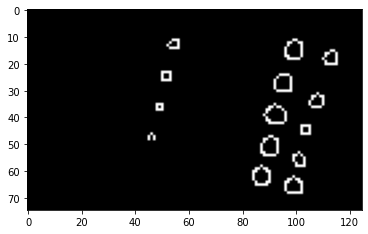

In [54]:


newsmoothed=smooth(crop1)
newthld=threshold(newsmoothed,103)

plt.imshow(process(crop1, 103),cmap = 'gray')

In [55]:
#prop=1.6,k=20,p1=50,p2=28,minrad=2,maxrad=40
#circscrop=circlemodel(process(crop1, 103),crop1,prop=1,k=7,p1=40,p2=5,minrad=2,maxrad=9)

In [56]:
arraycrop1=get_mic_int(crop1,1,circscrop[0])
trilinear(crop1,arraycrop1)


NameError: name 'circscrop' is not defined

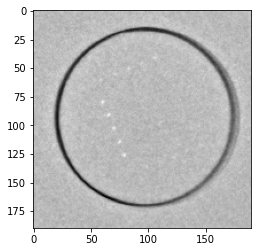

In [57]:
crop2=plt.imshow(bmp[1660:1850,360:550],"gray")

In [58]:
def interfunc(mu,I_o,h):
    return I_o*np.e**(-mu*h)

In [59]:
format2

array([[174.        , 590.        ,  17.        , 205.41666667],
       [ 42.        , 593.        ,  16.        , 194.79166667],
       [358.        , 586.        ,  18.        , 237.00833333],
       [601.        , 585.        ,  23.        , 205.84166667],
       [230.        , 590.        ,  20.        , 186.00833333],
       [486.        , 582.        ,  16.        , 226.525     ],
       [425.        , 586.        ,  15.        , 212.925     ],
       [662.        , 582.        ,  21.        , 196.20833333],
       [545.        , 585.        ,  14.        , 207.25833333],
       [302.        , 590.        ,  14.        , 213.06666667],
       [105.        , 590.        ,  19.        , 210.8       ]])

In [60]:
useful=format2
print(useful)
new=np.asarray([np.append(useful[i],i*0.003) for i in range(12)])
print(new)
#useful=np.insert(useful)

[[174.         590.          17.         205.41666667]
 [ 42.         593.          16.         194.79166667]
 [358.         586.          18.         237.00833333]
 [601.         585.          23.         205.84166667]
 [230.         590.          20.         186.00833333]
 [486.         582.          16.         226.525     ]
 [425.         586.          15.         212.925     ]
 [662.         582.          21.         196.20833333]
 [545.         585.          14.         207.25833333]
 [302.         590.          14.         213.06666667]
 [105.         590.          19.         210.8       ]]


IndexError: index 11 is out of bounds for axis 0 with size 11

$$
I=I_o e^{-\mu x}
$$
$$
 x = \mu\cdot \ln(I_o/I)
$$


In [61]:
from scipy.interpolate import interp1d

def inverse(mu,I_o,I):
    return mu*np.log(I_o/I)

In [62]:
depthi=interfunc(1,200,np.transpose(useful)[3])

[]

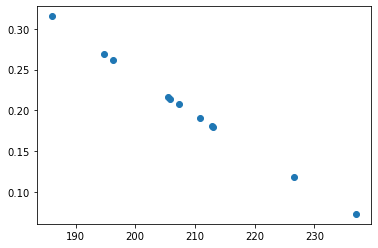

In [63]:
plt.scatter(np.transpose(useful)[3],inverse(1,255,np.transpose(useful)[3]))
plt.plot()

In [64]:
print(np.transpose(useful)[3])

[205.41666667 194.79166667 237.00833333 205.84166667 186.00833333
 226.525      212.925      196.20833333 207.25833333 213.06666667
 210.8       ]


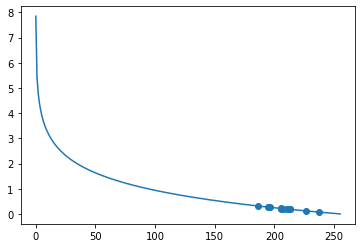

In [65]:
Iart=np.linspace(0.1,255,255)
plt.scatter(np.transpose(useful)[3],inverse(1,255,np.transpose(useful)[3]))
plt.plot(Iart,inverse(1,255,Iart))

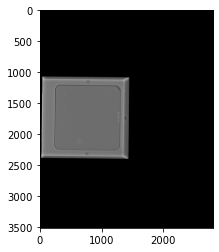

In [66]:
bmp2=cv2.imread("ImagenesHUSIDavidJurado/07b. CIRS015 - Manual Settings - F1_Gen2_VL.bmp",0)
#plt.figure(figsize=(20,10))
plt.imshow(bmp2,cmap="gray")

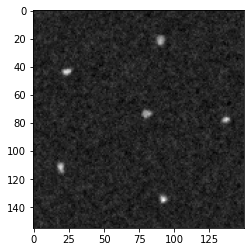

In [67]:
plt.imshow(bmp2[1775:1930,800:950],cmap="gray")

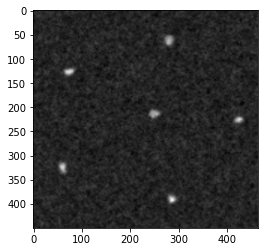

In [68]:
section=bmp2[1775:1930,800:950]
section=section*255/np.max(section)
shp=section.shape
phantomref=cv2.resize(bmp2[1775:1930,800:950],(shp[0]*3,shp[1]*3))
plt.imshow(phantomref,cmap="gray")



In [69]:
np.max(phantomref)
processed=process(phantomref, 100)

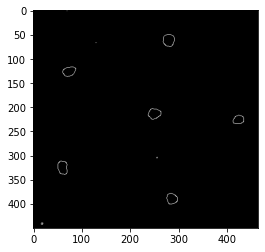

In [70]:
plt.imshow(processed,cmap="gray")

0.0


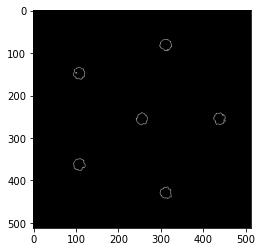

In [71]:
ct_scans2= sitk.GetArrayFromImage(sitk.ReadImage('lastsims/REAL240/Dosis-NbOfHits.mhd',sitk.sitkFloat32))
dosis2=ct_scans2[0]
dosis2=dosis2
#plt.imshow(dosis2,cmap="gray")
neg2=negative(dosis2)


newsmoothed2=smooth(neg2)

newthld2=threshold(smooth(neg2),170)
newedges2=edges(newthld2)
print(np.min(neg2))
#processed2=process(newsmoothed2, 100)
#newthld2
plt.imshow(newedges2,cmap="gray")

In [72]:
simulados=circlemodel(newedges2,dosis2)

[[[437.6       253.6        14.16     ]
  [309.6        82.4        14.       ]
  [255.2       256.80002    13.5199995]
  [309.6       429.6        11.92     ]
  [109.6       360.80002    12.88     ]
  [109.6       146.40001    11.76     ]]]


In [73]:
reales=circlemodel(processed,phantomref)

[[[280.80002   61.600002  12.400001]
  [285.6      389.6       11.280001]
  [ 64.8      322.4       15.12    ]
  [250.40001  216.8       13.68    ]
  [ 74.4      122.4       13.84    ]
  [426.4      224.8        9.52    ]]]


In [74]:
features1=get_mic_int(phantomref,4,reales[0])
features2=get_mic_int(neg2,4,simulados[0])
print(features1)
print(features2)

[[281.          62.          12.         119.65432099]
 [286.         390.          11.         126.67901235]
 [ 65.         322.          15.         116.02469136]
 [250.         217.          14.         116.83950617]
 [ 74.         122.          14.         114.39506173]
 [426.         225.          10.         121.95061728]]
[[438.         254.          14.         187.38977072]
 [310.          82.          14.         186.11552028]
 [255.         257.          14.         185.74074074]
 [310.         430.          12.         189.03880071]
 [110.         361.          13.         187.76455026]
 [110.         146.          12.         189.18871252]]


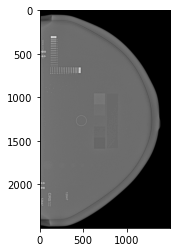

In [75]:
bmpref=cv2.imread("ImagenesHUSIDavidJurado/08b. CIRS011B - Manual Settings - F1_Gen2_VL.bmp",0)
plt.imshow(bmpref[500:3000:1,0:1500],"gray")

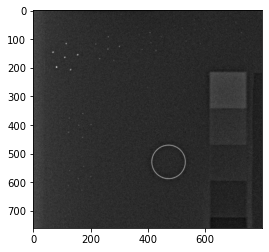

In [76]:
plt.imshow(bmpref[1240:2000,0:800],"gray")

In [77]:
calcifics=bmpref[1240:1455,60:800]
calcifics.shape

(215, 740)

In [78]:
bmprefsized=cv2.resize(bmpref[1240:1455,60:800],(calcifics.shape[1]*9,calcifics.shape[0]*9))

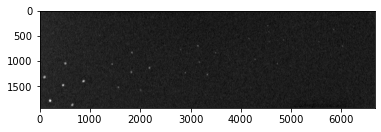

In [79]:
plt.imshow(bmprefsized,"gray")

In [80]:
#refprocess1=process(bmprefsized,107)
def recolor(img,param1=4,longs=1):
    newfig=np.copy(img)
    width,height= np.shape(newfig)
    print(height,width)
    for i in range(longs,width-longs):
        for j in range(longs,height-longs):
            if newfig[i][j]>100:
                        counter=0
                        for k in range(longs): 
                            if newfig[i+k][j]>100:
                                counter+=1
                            if newfig[i+k][j+k]>100:
                                counter+=1
                            if newfig[i+k][j-k]>100:
                                counter+=1
                            if newfig[i][j+k]>100:
                                counter+=1
                            if newfig[i][j-k]>100:
                                counter+=1
                            if newfig[i-k][j]>100:
                                counter+=1
                            if newfig[i-k][j+k]>100:
                                counter+=1
                            if newfig[i-k][j-k]>100:
                                counter+=1
                        #print(counter)
                        if counter<param1:
                            newfig[i][j]=0
                        else:
                            tile=np.random.randint(-longs,longs)
                            #print(tile)
                            newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j+tile]=200
                            #newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j-tile]=200               
    return newfig

def reiter2(fig,n):
    newfig=np.copy(fig)
    for i in range(n):
        newfig=recolor(newfig,9,2)
    return newfig


def process2(img, intensity):
    newneg=negative(img)
    newsmoothed=smooth(img)
    newthld=threshold(newsmoothed,intensity)
    reit=reiter2(newthld,3)
    newedges=edges(reit)
    return newedges

refprocess2=process2(bmprefsized,107)

6660 1935
6660 1935
6660 1935


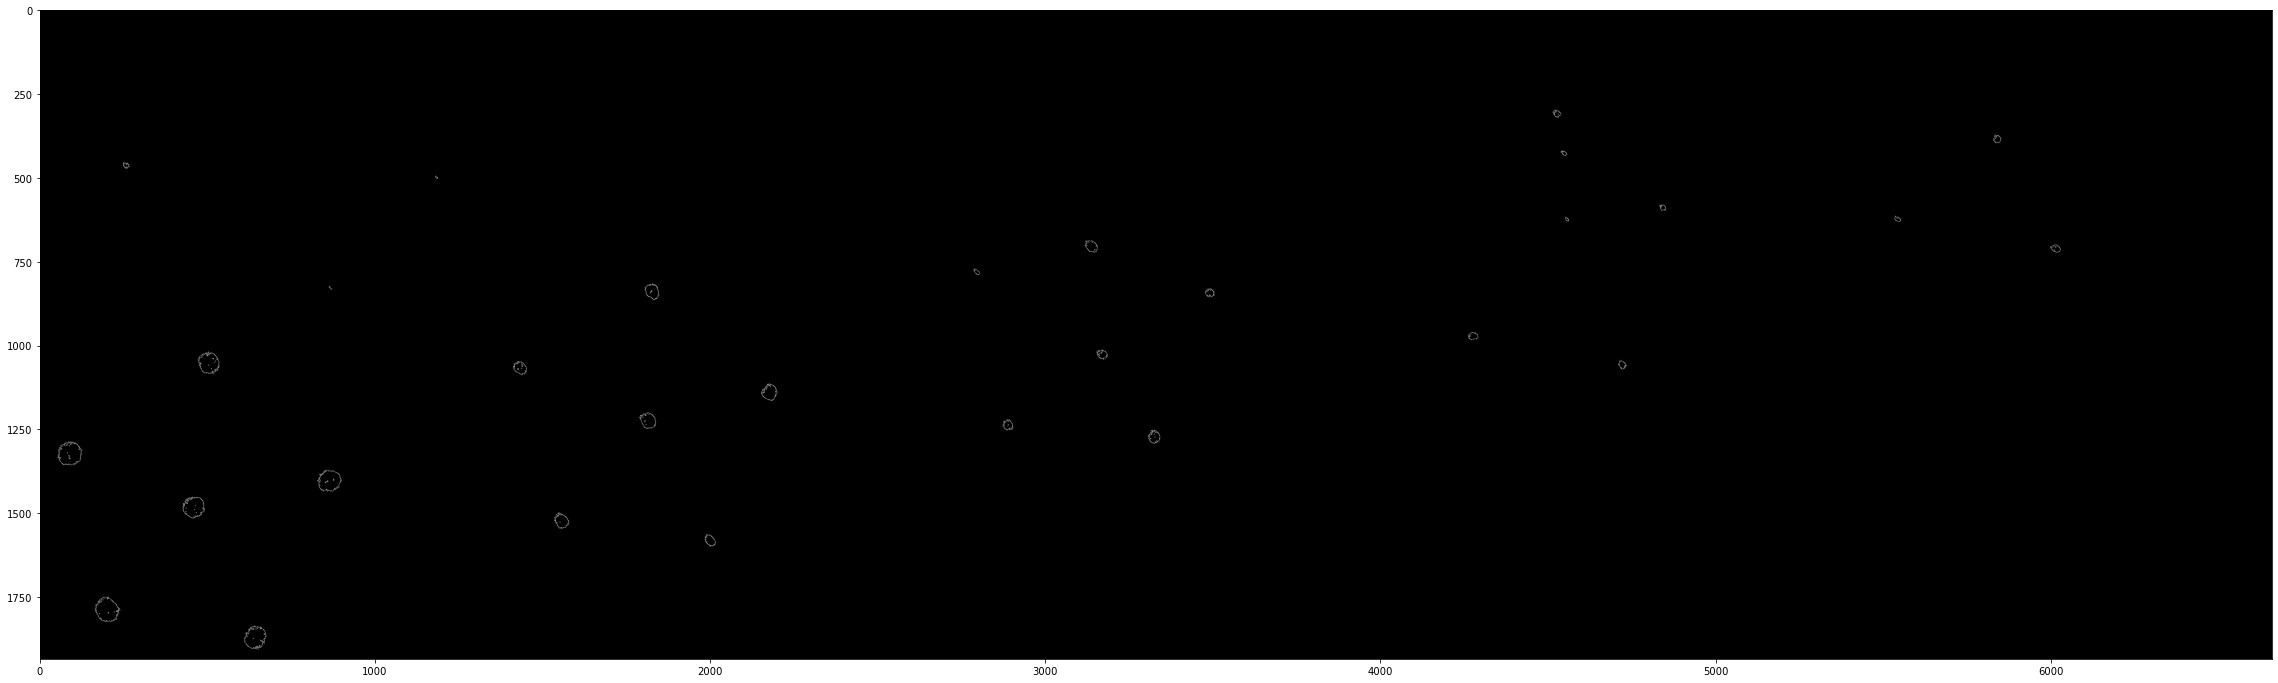

In [81]:
plt.figure(figsize=(40,16))
plt.imshow(refprocess2,"gray")

[125.02215278 118.91153333 116.42229167 114.2518     110.41285714]


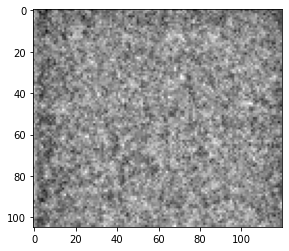

In [82]:
mat =bmpref[1450:2090,620:750]
int1=bmpref[1460:1580,620:740]
int2=bmpref[1585:1710,620:740]
int3=bmpref[1710:1830,620:740]
int4=bmpref[1835:1960,620:740]
int5=bmpref[1965:2070,620:740]

plt.imshow(int5,"gray")

intmat=np.asarray([integral(int1)+20,integral(int2)+20,integral(int3)+20,integral(int4)+20,integral(int5)+20])
print(intmat)

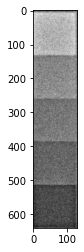

In [83]:
def inverse(mu,I_o,I):
    return mu*np.log(I_o/I)
plt.imshow(mat,"gray")


In [84]:
referencecircles=circlemodel(refprocess2,bmprefsized,prop=0.5,k=50,p1=40,p2=10,minrad=2,maxrad=40)

[[[8.7500e+01 1.3215e+03 3.4900e+01]
  [6.4250e+02 1.8675e+03 3.0800e+01]
  [1.9850e+02 1.7885e+03 3.3800e+01]
  [4.5950e+02 1.4815e+03 2.9900e+01]
  [5.0250e+02 1.0525e+03 2.8600e+01]
  [8.6450e+02 1.4005e+03 3.0500e+01]
  [2.1755e+03 1.1405e+03 2.1300e+01]
  [1.8155e+03 1.2245e+03 2.1000e+01]
  [1.5525e+03 1.5255e+03 2.3000e+01]
  [3.3255e+03 1.2735e+03 1.6600e+01]
  [2.8865e+03 1.2375e+03 1.3400e+01]
  [1.4305e+03 1.0685e+03 1.8800e+01]
  [1.8305e+03 8.3550e+02 2.3000e+01]
  [4.2725e+03 9.7150e+02 1.1600e+01]
  [3.1385e+03 7.0550e+02 1.7300e+01]
  [3.1695e+03 1.0235e+03 1.3800e+01]
  [3.4885e+03 8.4350e+02 1.1800e+01]
  [6.0135e+03 7.0950e+02 1.1000e+01]
  [5.8395e+03 3.8550e+02 1.1000e+01]
  [2.0005e+03 1.5835e+03 1.3200e+01]
  [4.7225e+03 1.0595e+03 9.6000e+00]
  [5.5425e+03 6.2050e+02 9.6000e+00]
  [2.5550e+02 4.6250e+02 8.0000e+00]
  [4.5295e+03 3.1050e+02 8.2000e+00]
  [4.8415e+03 5.9150e+02 7.1000e+00]
  [2.7935e+03 7.7850e+02 6.0000e+00]]]


In [85]:
masses = get_mic_int(bmprefsized,10,referencecircles[0])

#print(masses)

massesT=np.transpose(masses)

#massesT[2]=massesT[2]/2


def realradius(circles):
    circs=np.copy(circles)
    for i in range(len(circs)):
        print(circles[i][2],i,len(circs))
        if circs[i][2]<8:
            circs[i][2]=0.130
        if circs[i][2]>=27:
            circs[i][2]=0.4
        if circs[i][2]<27 and circs[i][2]>=22:
            circs[i][2]=0.275
        if circs[i][2]<22 and circs[i][2]>=17:
            circs[i][2]=0.230
        if circs[i][2]<17 and circs[i][2]>=13:
            circs[i][2]=0.196
        if circs[i][2]<13 and circs[i][2]>=8:
            circs[i][2]=0.165
    dots=[]
    indexfirst=np.where(circs==0.130)[0]
    group1=[circs[i][3] for i in indexfirst]
    dots.append(np.mean(group1))
    indexsecond=np.where(circs==0.165)[0]
    group2=[circs[i][3] for i in indexsecond]
    dots.append(np.mean(group2))
    indexthird=np.where(circs==0.196)[0]
    group3=[circs[i][3] for i in indexthird]
    dots.append(np.mean(group3))
    indexfourth=np.where(circs==0.230)[0]
    group4=[circs[i][3] for i in indexfourth]
    dots.append(np.mean(group4))
    indexfifth=np.where(circs==0.275)[0]
    group5=[circs[i][3] for i in indexfifth]
    dots.append(np.mean(group5))
    indexsixth=np.where(circs==0.4)[0]
    group6=[circs[i][3] for i in indexsixth]
    dots.append(np.mean(group6))
    return(np.transpose(circs),dots)
    

#print(realradius(masses))
#masseswrefrad[2]=[0.4,0.4,0.4,0.4,0.4,0.230,0.275,0.275,0.275,0.275,0.275,0.230,0.275,0.230,0.230,0.230,0.230,0.230,0.230,0.196,0.196,0.196,0.196,0.196,0.196,0.196,0.196,0.165,0.165,0.165,0.165,0.165]
array=realradius(masses)[0]
array2=realradius(masses)[1]
print(array)
#print(np.shape(masseswrefrad))

35.0 0 26
31.0 1 26
34.0 2 26
30.0 3 26
29.0 4 26
30.0 5 26
21.0 6 26
21.0 7 26
23.0 8 26
17.0 9 26
13.0 10 26
19.0 11 26
23.0 12 26
12.0 13 26
17.0 14 26
14.0 15 26
12.0 16 26
11.0 17 26
11.0 18 26
13.0 19 26
10.0 20 26
10.0 21 26
8.0 22 26
8.0 23 26
7.0 24 26
6.0 25 26
35.0 0 26
31.0 1 26
34.0 2 26
30.0 3 26
29.0 4 26
30.0 5 26
21.0 6 26
21.0 7 26
23.0 8 26
17.0 9 26
13.0 10 26
19.0 11 26
23.0 12 26
12.0 13 26
17.0 14 26
14.0 15 26
12.0 16 26
11.0 17 26
11.0 18 26
13.0 19 26
10.0 20 26
10.0 21 26
8.0 22 26
8.0 23 26
7.0 24 26
6.0 25 26
[[8.80000000e+01 6.42000000e+02 1.98000000e+02 4.60000000e+02
  5.02000000e+02 8.64000000e+02 2.17600000e+03 1.81600000e+03
  1.55200000e+03 3.32600000e+03 2.88600000e+03 1.43000000e+03
  1.83000000e+03 4.27200000e+03 3.13800000e+03 3.17000000e+03
  3.48800000e+03 6.01400000e+03 5.84000000e+03 2.00000000e+03
  4.72200000e+03 5.54200000e+03 2.56000000e+02 4.53000000e+03
  4.84200000e+03 2.79400000e+03]
 [1.32200000e+03 1.86800000e+03 1.78800000e+03 1.48

In [88]:
massesrl= get_mic_int(phantomref,10,reales[0])
massesrlT=np.transpose(massesrl)
masseswrefrad=get_mic_int(bmprefsized,10,referencecircles[0])
masseswrefradT=np.transpose(masseswrefrad)
print(array2)
print(len(array))

[106.06802721088435, 107.65674603174604, 110.73922902494331, 119.42947845804989, 118.15192743764172, 147.06349206349205]
4


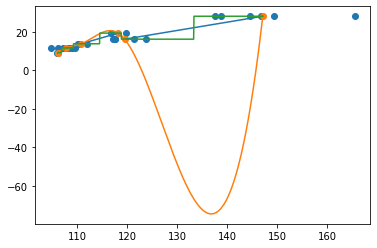

In [89]:
x=array2
y=[0.130*70,0.165*70,0.196*70,0.230*70,0.275*70,0.4*70]
xnew=np.linspace(min(x),max(x),600)
plt.scatter(array[3],array[2]*70)
#plt.scatter(massesrlT[3],massesrlT[2])
y=[0.130*70,0.165*70,0.196*70,0.230*70,0.275*70,0.4*70]
f2linear=interp1d(x,y,kind="linear",)
f2cubic=interp1d(x,y,kind="cubic",)
f2nearest=interp1d(x,y,kind="nearest",)


#plt.scatter(masseswrefradT[3],masseswrefradT[2])
plt.scatter(array2,[0.130*70,0.165*70,0.196*70,0.230*70,0.275*70,0.4*70])
x=array[3]
y=array[2]*70
coefficients=np.polyfit(np.log(x),y,1)
plt.plot(xnew,f2linear(xnew))
plt.plot(xnew,f2cubic(xnew))
plt.plot(xnew,f2nearest(xnew))

#plt.plot(xnew,coefficients[0]*np.log(xnew)+coefficients[1] )
#plt.xlim(130,140)
#plt.ylim(20,25)

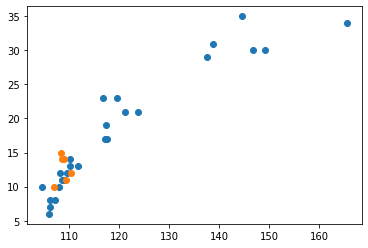

In [90]:
xnew=np.linspace(min(massesT[3]),max(massesT[3]),600)
plt.scatter(massesT[3],massesT[2])
plt.scatter(massesrlT[3],massesrlT[2])
f2=interp1d(massesT[3],massesT[2],kind="linear",)

#plt.scatter(masseswrefrad[3],masseswrefrad[2])

In [91]:
def predict_outcome(feature_matrix, weights):
    predictions=np.dot(feature_matrix,weights)
    return(predictions)

def feature_derivative(errors, feature):
    derivative=2*np.dot(feature,errors)
    return(derivative)

def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    #features_matrix,outputs=get_numpy_data(feature_matrix,outputs)
    while not converged:
        
        predictions=predict_outcome(feature_matrix,weights)
        errors=predictions-output
        gradient_sum_squares = 0 # initialize the gradient
        for i in range(len(weights)):
            derivative=feature_derivative(feature_matrix[:,i],errors)
            gradient_sum_squares+=derivative**2
            weights[i]=weights[i]-step_size*derivative
        gradient_magnitude = np.sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [92]:
def createArray(img):
    integrals=[]
    y,x=np.shape(img)
    for i in range(1,3):
        for j in range (1,3):
            section1=img[int(x/i):int(x/(i+1))][int(y/j):int(y/(j+1))]
            integrals.append(integrate(section1))
    return integrals

In [93]:
def importimage(path):
    scan= sitk.GetArrayFromImage(sitk.ReadImage(path,sitk.sitkFloat32))
    #hitsplot=scan[0]
    plt.imshow(scan,cmap="gray")
    return scan

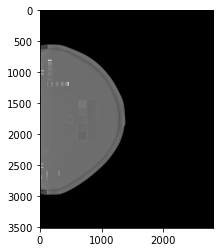

In [94]:
realCIRS011=importimage("Imagenes TIFF/CIRS011 - PP (DCM 75419113 - Disk 1).tif")

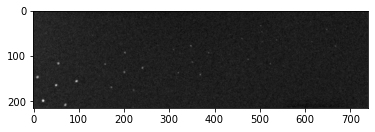

In [95]:
plt.imshow(realCIRS011[1240:1455,60:800],"gray")

In [96]:
def importimagemhd(path):
    scan= sitk.GetArrayFromImage(sitk.ReadImage(path,sitk.sitkFloat32))
    hitsplot=scan[0]
    plt.imshow(hitsplot,cmap="gray")
    return hitsplot

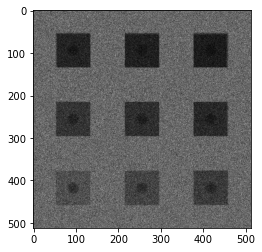

In [97]:
OXAL=importimagemhd("depthinter/OX/Dosis-NbOfHits.mhd")

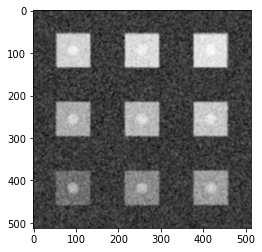

In [98]:
negOXAL=negative(OXAL)
smoothedOXAL=smooth(negOXAL)
thldOXAL=threshold(smoothedOXAL,200)
plt.imshow(smoothedOXAL,cmap="gray")


In [99]:
reg9=smoothedOXAL[55:135,377:455]
reg8=smoothedOXAL[55:135,216:295]
reg7=smoothedOXAL[55:135,55:135]
reg6=smoothedOXAL[216:295,377:455]
reg5=smoothedOXAL[216:295,216:295]
reg4=smoothedOXAL[216:295,55:135]
reg3=smoothedOXAL[377:455,377:455]
reg2=smoothedOXAL[377:455,216:295]
reg1=smoothedOXAL[377:455,55:135]
regions=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]

In [100]:
intensities=[integral(i) for i in regions]
intensidades=matrixextract(smoothedOXAL)
print(intensidades)

NameError: name 'matrixextract' is not defined

In [101]:
distancias=[4,8,12,16,20,24,28,32,36]

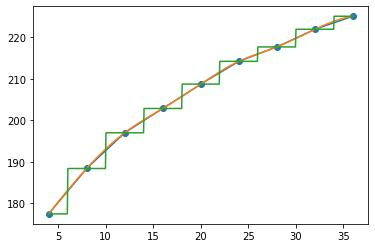

In [102]:
plt.scatter(distancias,intensities)
xnewlarge=np.linspace(min(distancias),max(distancias),600)
interplargelinear=interp1d(distancias,intensities,kind="linear")
interplargecubic=interp1d(distancias,intensities,kind="cubic")
interplargenearest=interp1d(distancias,intensities,kind="nearest")
plt.plot(xnewlarge,interplargelinear(xnewlarge))
plt.plot(xnewlarge,interplargecubic(xnewlarge))
plt.plot(xnewlarge,interplargenearest(xnewlarge))

In [103]:
plt.plot(distancias,interp2(distancias))

NameError: name 'interp2' is not defined

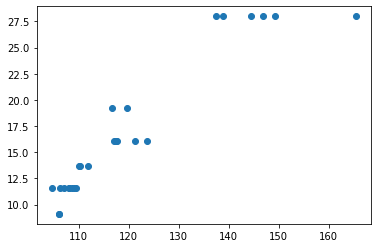

In [104]:
plt.scatter(array[3],array[2]*70)

In [105]:
def matrixextract(img):
    reg9=img[55:75,377:455]
    reg8=img[55:75,216:295]
    reg7=img[55:75,55:135]
    reg6=img[216:235,377:455]
    reg5=img[216:235,216:295]
    reg4=img[216:235,55:135]
    reg3=img[377:397,377:455]
    reg2=img[377:397,216:295]
    reg1=img[377:397,55:135]
    regions=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]
    intensities=[integral(i) for i in regions]
    return intensities

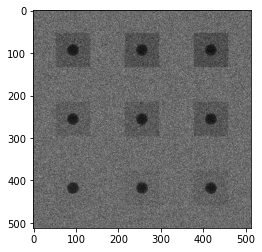

In [106]:
lowdepths=importimagemhd("depthinter/4mm/Dosis-NbOfHits.mhd")
neglow=negative(lowdepths)
smoothlow=smooth(neglow)
thldlow=threshold(smoothlow,200)

In [107]:
matrixextract(smoothlow)

[150.31200873703895,
 153.3985837497146,
 157.1734332114657,
 160.84027229628094,
 164.12746833937388,
 166.49298308804717,
 170.37043167579503,
 173.06929788741843,
 174.92387946483638]

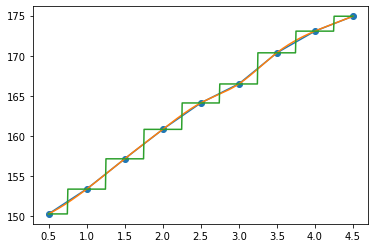

In [108]:
lowdistancias=[0.5,1,1.5,2,2.5,3,3.5,4,4.5]
plt.scatter(lowdistancias,matrixextract(smoothlow))
xnewdepth=np.linspace(min(lowdistancias),max(lowdistancias),600)

fdepthlinear=interp1d(lowdistancias,matrixextract(smoothlow),kind="linear")
fdepthcubic=interp1d(lowdistancias,matrixextract(smoothlow),kind="cubic")
fdepthnearest=interp1d(lowdistancias,matrixextract(smoothlow),kind="nearest")

plt.plot(xnewdepth,fdepthlinear(xnewdepth))
plt.plot(xnewdepth,fdepthcubic(xnewdepth))
plt.plot(xnewdepth,fdepthnearest(xnewdepth))

#plt.scatter(distancias,intensities)

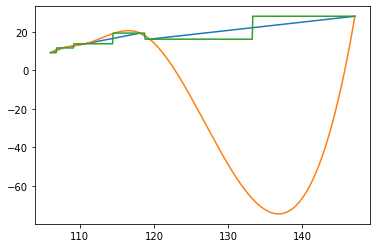

In [109]:
x=array2

xnew=np.linspace(min(x),max(x),600)

plt.plot(xnew,f2linear(xnew))
plt.plot(xnew,f2cubic(xnew))
plt.plot(xnew,f2nearest(xnew))

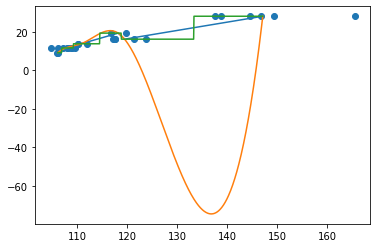

In [110]:
plt.plot(xnew,f2linear(xnew))
plt.plot(xnew,f2cubic(xnew))
plt.plot(xnew,f2nearest(xnew))
plt.scatter(array[3],array[2]*70)

35.0 0 26
31.0 1 26
34.0 2 26
30.0 3 26
29.0 4 26
30.0 5 26
21.0 6 26
21.0 7 26
23.0 8 26
17.0 9 26
13.0 10 26
19.0 11 26
23.0 12 26
12.0 13 26
17.0 14 26
14.0 15 26
12.0 16 26
11.0 17 26
11.0 18 26
13.0 19 26
10.0 20 26
10.0 21 26
8.0 22 26
8.0 23 26
7.0 24 26
6.0 25 26


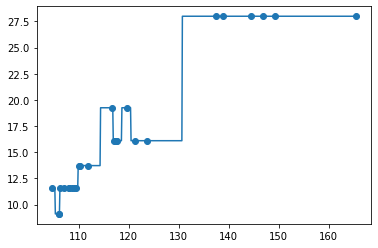

In [111]:
array=realradius(masses)[0]
plt.scatter(array[3],array[2]*70)
y=[0.130*70,0.165*70,0.196*70,0.230*70,0.275*70,0.4*70]
f22linear=interp1d(array[3],array[2]*70,kind="linear",)
f22cubic=interp1d(array[3],array[2]*70,kind="cubic",)
f22nearest=interp1d(array[3],array[2]*70,kind="nearest",)
xtotry=np.linspace(min(array[3]),max(array[3]),600)
plt.plot(xtotry,f22nearest(xtotry))


In [112]:
def recolor(img,param1=4,longs=1):
    newfig=np.copy(img)
    width,height= np.shape(newfig)
    print(height,width)
    for i in range(longs,width-longs):
        for j in range(longs,height-longs):
            if newfig[i][j]>100:
                        counter=0
                        for k in range(longs): 
                            if newfig[i+k][j]>100:
                                counter+=1
                            if newfig[i+k][j+k]>100:
                                counter+=1
                            if newfig[i+k][j-k]>100:
                                counter+=1
                            if newfig[i][j+k]>100:
                                counter+=1
                            if newfig[i][j-k]>100:
                                counter+=1
                            if newfig[i-k][j]>100:
                                counter+=1
                            if newfig[i-k][j+k]>100:
                                counter+=1
                            if newfig[i-k][j-k]>100:
                                counter+=1
                        #print(counter)
                        if counter<param1:
                            newfig[i][j]=0
                        else:
                            tile=np.random.randint(-longs,longs)
                            #print(tile)
                            newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j+tile]=200
                            #newfig[i+tile][j+tile]=200
                            #newfig[i-tile][j-tile]=200               
    return newfig

def reiter2(fig,n):
    newfig=np.copy(fig)
    for i in range(n):
        newfig=recolor(newfig,10,2)
    return newfig


def process2(img, intensity):
    newneg=negative(img)
    newsmoothed=smooth(img)
    newthld=threshold(newsmoothed,intensity)
    reit=reiter2(newthld,2)
    newedges=edges(reit)
    return newedges


6660 1935
6660 1935
6660 1935


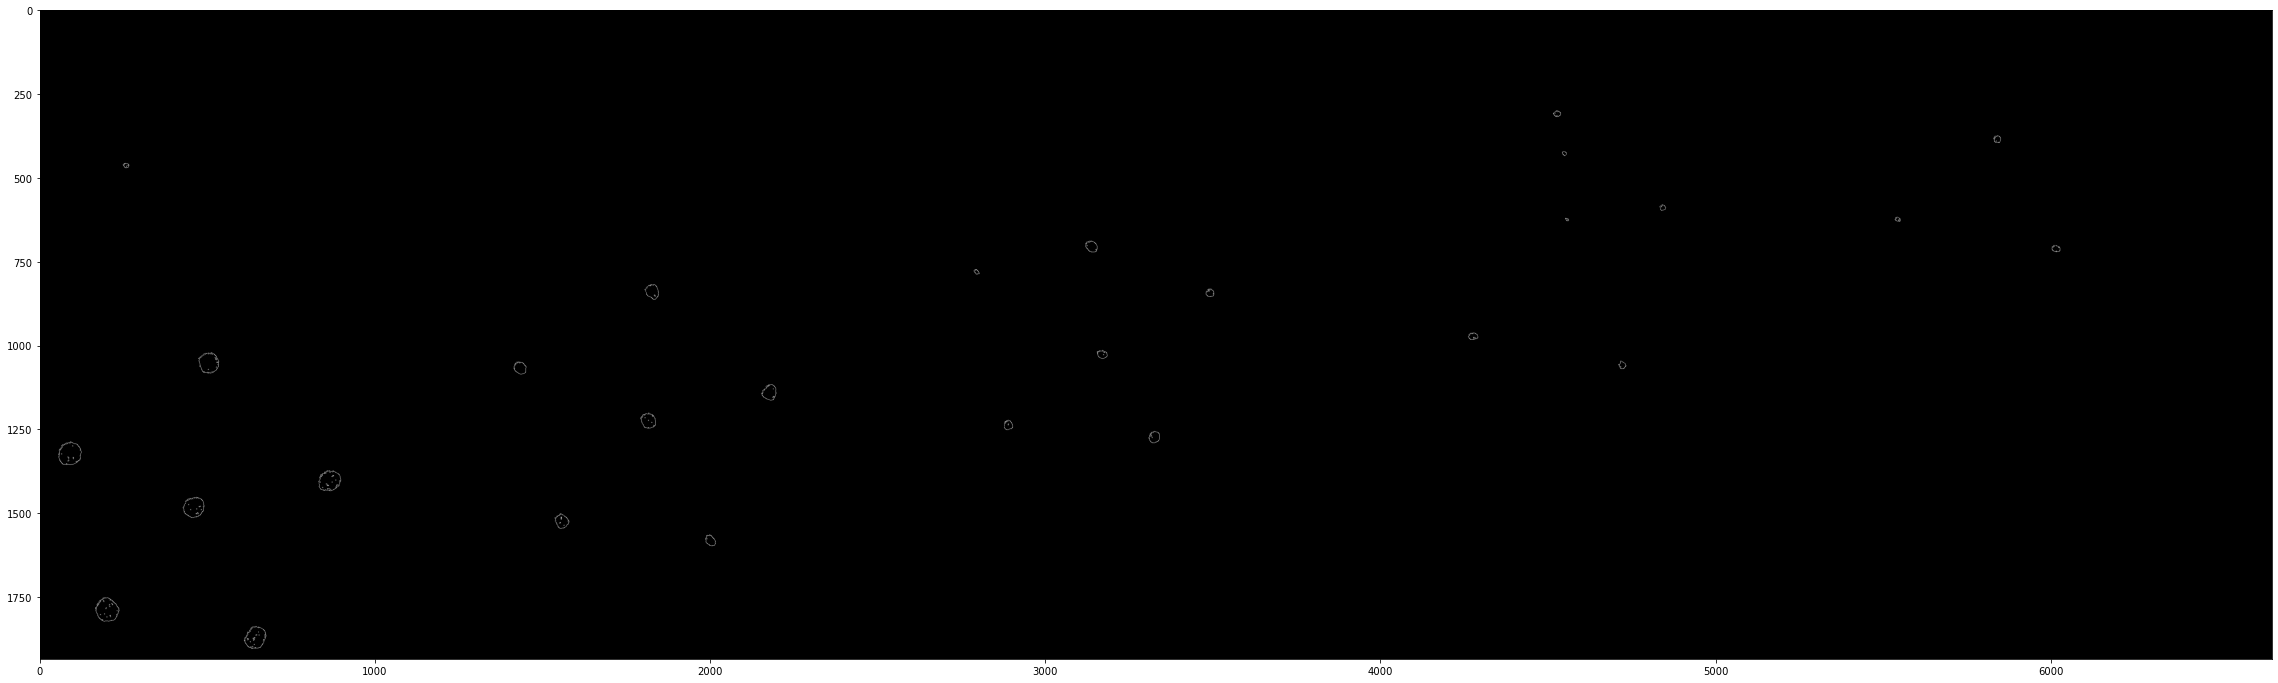

In [449]:
realCIRS011calcs=realCIRS011[1240:1455,60:800]


increase=cv2.resize(realCIRS011calcs,(calcifics.shape[1]*9,calcifics.shape[0]*9))


realCIRS011calcs=increase*255/4092
processedCIRS011=process2(realCIRS011calcs, 108)

plt.figure(figsize=(40,16))
plt.imshow(processedCIRS011,"gray")
#print(realCIRS011calcs)


[[[8.7500e+01 1.3225e+03 3.3800e+01]
  [8.6550e+02 1.4015e+03 3.0200e+01]
  [1.9950e+02 1.7895e+03 3.2700e+01]
  [4.5850e+02 1.4835e+03 2.8900e+01]
  [5.0450e+02 1.0535e+03 2.8500e+01]
  [6.3750e+02 1.8695e+03 3.3800e+01]
  [1.8145e+03 1.2255e+03 2.0200e+01]
  [3.3245e+03 1.2745e+03 1.6700e+01]
  [1.5555e+03 1.5255e+03 2.0500e+01]
  [2.1745e+03 1.1365e+03 2.1700e+01]
  [1.8275e+03 8.3750e+02 1.9100e+01]
  [1.4325e+03 1.0685e+03 1.7200e+01]
  [3.1375e+03 7.0450e+02 1.6300e+01]
  [2.8875e+03 1.2365e+03 1.4100e+01]
  [3.1695e+03 1.0255e+03 1.4100e+01]
  [3.4905e+03 8.4350e+02 1.1800e+01]
  [5.8415e+03 3.8350e+02 9.6000e+00]
  [4.2765e+03 9.7250e+02 1.1400e+01]
  [1.9955e+03 1.5855e+03 1.8800e+01]
  [4.7205e+03 1.0585e+03 1.1100e+01]
  [6.0145e+03 7.1250e+02 1.1800e+01]
  [4.5255e+03 3.0950e+02 8.8000e+00]
  [4.8415e+03 5.8850e+02 7.8000e+00]
  [2.5850e+02 4.6350e+02 7.4000e+00]
  [5.5405e+03 6.2350e+02 7.4000e+00]
  [4.5475e+03 4.2550e+02 6.0000e+00]
  [2.7955e+03 7.8250e+02 5.5000e+00]
 

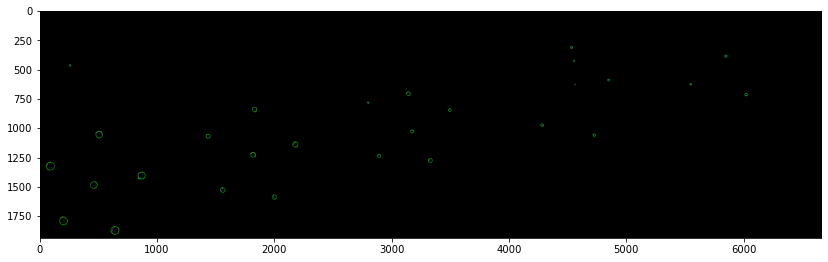

In [452]:
bigone=circlemodel(processedCIRS011,realCIRS011calcs,prop=0.5,k=30,p1=10,p2=10,minrad=2,maxrad=40) 

In [115]:
datosftm = get_mic_int(realCIRS011calcs,2,bigone[0])
datosftmT= np.transpose(get_mic_int(realCIRS011calcs,10,bigone[0]))
print(datosftm)

[[1.98000000e+02 1.78800000e+03 3.30000000e+01 1.70868574e+02]
 [9.00000000e+01 1.32000000e+03 3.40000000e+01 1.48608438e+02]
 [5.02000000e+02 1.05000000e+03 3.00000000e+01 1.40676523e+02]
 [8.64000000e+02 1.40400000e+03 3.10000000e+01 1.53309893e+02]
 [6.50000000e+02 1.86400000e+03 2.50000000e+01 1.38209248e+02]
 [1.81400000e+03 1.22400000e+03 2.20000000e+01 1.24435088e+02]
 [4.68000000e+02 1.47400000e+03 2.20000000e+01 1.44683252e+02]
 [2.17400000e+03 1.14200000e+03 2.00000000e+01 1.27849443e+02]
 [1.82400000e+03 8.36000000e+02 1.80000000e+01 1.24554961e+02]
 [1.43600000e+03 1.06800000e+03 1.70000000e+01 1.23413262e+02]
 [3.13800000e+03 7.06000000e+02 1.70000000e+01 1.25169365e+02]
 [1.55800000e+03 1.52400000e+03 1.90000000e+01 1.20409277e+02]
 [2.88800000e+03 1.23800000e+03 1.40000000e+01 1.17985859e+02]
 [2.00000000e+03 1.58400000e+03 1.20000000e+01 1.12309336e+02]
 [3.32400000e+03 1.27200000e+03 1.60000000e+01 1.23314541e+02]
 [3.49200000e+03 8.42000000e+02 1.10000000e+01 1.146842

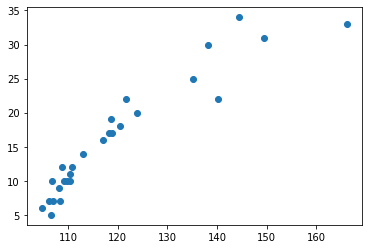

In [116]:
plt.scatter(datosftmT[3],datosftmT[2])

In [117]:
def realradius2(circles):
    circs=np.copy(circles)
    for i in range(len(circs)):
        print(circles[i][2],i,len(circs))
        if circs[i][2]<8:
            circs[i][2]=0.165
        if circs[i][2]>=26:
            circs[i][2]=0.4
        if circs[i][2]<26 and circs[i][2]>=20:
            circs[i][2]=0.275
        if circs[i][2]<20 and circs[i][2]>=15:
            circs[i][2]=0.230
        if circs[i][2]<15 and circs[i][2]>=8:
            circs[i][2]=0.196
    dots=[]
    #indexfirst=np.where(circs==0.130)[0]
   # group1=[circs[i][3] for i in indexfirst]
    #dots.append(np.mean(group1))
    indexsecond=np.where(circs==0.165)[0]
    group2=[circs[i][3] for i in indexsecond]
    dots.append(np.mean(group2))
    indexthird=np.where(circs==0.196)[0]
    group3=[circs[i][3] for i in indexthird]
    dots.append(np.mean(group3))
    indexfourth=np.where(circs==0.230)[0]
    group4=[circs[i][3] for i in indexfourth]
    dots.append(np.mean(group4))
    indexfifth=np.where(circs==0.275)[0]
    group5=[circs[i][3] for i in indexfifth]
    dots.append(np.mean(group5))
    indexsixth=np.where(circs==0.4)[0]
    group6=[circs[i][3] for i in indexsixth]
    dots.append(np.mean(group6))
    return(np.transpose(circs),dots)

    

In [118]:
arrayreal=realradius2(datosftm)[0]
promedios=realradius2(datosftm)[1]


33.0 0 27
34.0 1 27
30.0 2 27
31.0 3 27
25.0 4 27
22.0 5 27
22.0 6 27
20.0 7 27
18.0 8 27
17.0 9 27
17.0 10 27
19.0 11 27
14.0 12 27
12.0 13 27
16.0 14 27
11.0 15 27
10.0 16 27
10.0 17 27
9.0 18 27
12.0 19 27
10.0 20 27
10.0 21 27
7.0 22 27
7.0 23 27
7.0 24 27
6.0 25 27
5.0 26 27
33.0 0 27
34.0 1 27
30.0 2 27
31.0 3 27
25.0 4 27
22.0 5 27
22.0 6 27
20.0 7 27
18.0 8 27
17.0 9 27
17.0 10 27
19.0 11 27
14.0 12 27
12.0 13 27
16.0 14 27
11.0 15 27
10.0 16 27
10.0 17 27
9.0 18 27
12.0 19 27
10.0 20 27
10.0 21 27
7.0 22 27
7.0 23 27
7.0 24 27
6.0 25 27
5.0 26 27


(4, 27)


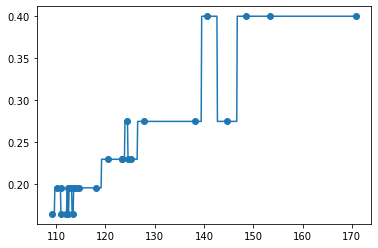

In [119]:
print(np.shape(arrayreal))
h=[0.165,0.196,0.230,0.275,0.4]
plt.scatter(arrayreal[3],arrayreal[2])
f22linear=interp1d(arrayreal[3],arrayreal[2],kind="linear",)
f22cubic=interp1d(arrayreal[3],arrayreal[2],kind="cubic",)
f22nearest=interp1d(arrayreal[3],arrayreal[2],kind="nearest",)
xnuevo=np.linspace(min(arrayreal[3]),max(arrayreal[3]),600)
#plt.plot(xnuevo,f22linear(xnuevo))
#plt.plot(xnuevo,f22cubic(xnuevo))
plt.plot(xnuevo,f22nearest(xnuevo))



4095.0

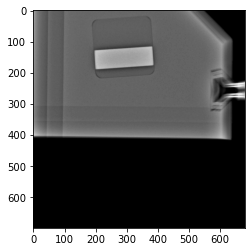

In [120]:
testUAP=importimage("Imagenes TIFF/UAP Matrix - PP (DCM 75419559 - Disk 2).tif")
plt.imshow(testUAP[1400:2100:1,40:720],cmap="gray")
np.max(testUAP[1400:2100:1,40:720])

#increase=cv2.resize(realCIRS011calcs,(calcifics.shape[1]*9,calcifics.shape[0]*9))


#realCIRS011calcs=increase*255/4092

[117.2006, 109.8073375, 135.7963, 98.69831875, 90.15863125, 103.8228375, 104.7488125, 94.4907875, 110.07775]


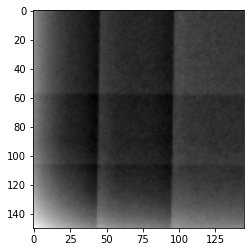

In [121]:
plt.imshow(testUAP[1650:1800:1,40:185],cmap="gray")
mat=testUAP[1650:1800:1,40:185]

normalize=mat*255/4092
#print(max(mat))

reg9=normalize[10:35,5:30]
reg8=normalize[10:35,60:85]
reg7=normalize[10:35,110:135]
reg6=normalize[60:85,5:30]
reg5=normalize[60:85,60:85]
reg4=normalize[60:85,110:135]
reg3=normalize[120:145,5:30]
reg2=normalize[120:145,60:85]
reg1=normalize[120:145,110:135]
regions=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]

intensities=[integral(i) for i in regions]

print(intensities)

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

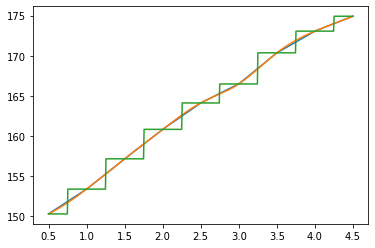

In [122]:
plt.plot(xnewdepth,fdepthlinear(xnewdepth))
plt.plot(xnewdepth,fdepthcubic(xnewdepth))
plt.plot(xnewdepth,fdepthnearest(xnewdepth))
plt.scatter

1996.0
124.262695


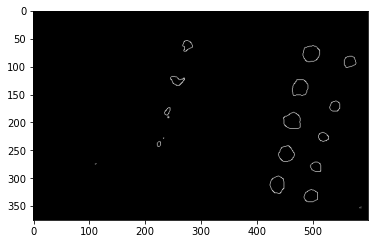

In [447]:
testUAP2=importimage("Imagenes TIFF/UAP #1 uCs, #2 uCs - PP (DCM 75419069 - Disk 1).tif")

calcsUAP1=testUAP2[1540:1615:1,215:335]
increase=cv2.resize(calcsUAP1,(calcsUAP1.shape[1]*5,calcsUAP1.shape[0]*5))
print(np.max(calcsUAP1))
mics1=increase*255/4096
mics2=increase*255/4096
processedmics1=process(mics1, 106)
print(np.max(mics2))
plt.imshow(processedmics1,cmap="gray")

[[[496.5  77.5  14.4]
  [476.5 137.5  14.5]
  [452.5 257.5  13.6]
  [497.5 331.5  12.2]
  [463.5 197.5  14.4]
  [436.5 310.5  13. ]
  [539.5 170.5   8.4]
  [506.5 278.5   8.4]
  [276.5  62.5   7.8]
  [567.5  90.5   9.4]
  [256.5 123.5  10. ]
  [518.5 225.5   6.9]
  [243.5 183.5   7.8]
  [225.5 238.5   5.2]]]


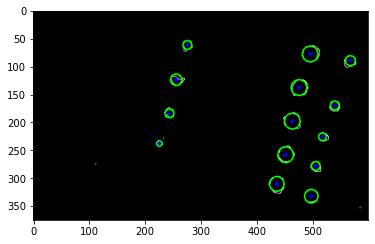

In [448]:
retrieve=circlemodel(processedmics1,mics1,prop=0.5,k=30,p1=10,p2=8,minrad=4,maxrad=40) 

In [125]:
chars=get_mic_int(mics2,1,retrieve[0])

In [126]:
print(chars)

[[496.          78.          14.         117.76068793]
 [476.         138.          14.         120.04424371]
 [452.         258.          14.         121.04779731]
 [498.         332.          12.         121.83721246]
 [464.         198.          14.         117.89765082]
 [436.         310.          13.         116.14453125]
 [540.         170.           8.         116.62017144]
 [506.         278.           8.         115.08120388]
 [276.          62.           8.         110.17792426]
 [568.          90.           9.         114.65536838]
 [256.         124.          10.         107.72006565]
 [518.         226.           7.         114.03032769]]


14.0 0 12
14.0 1 12
14.0 2 12
12.0 3 12
14.0 4 12
13.0 5 12
8.0 6 12
8.0 7 12
8.0 8 12
9.0 9 12
10.0 10 12
7.0 11 12
(4, 12) (4, 12)
[[496.         476.         452.         498.         464.
  436.         540.         506.         276.         568.
  256.         518.        ]
 [ 78.         138.         258.         332.         198.
  310.         170.         278.          62.          90.
  124.         226.        ]
 [ 14.          14.          14.          12.          14.
   13.           8.           8.           8.           9.
   10.           7.        ]
 [117.76068793 120.04424371 121.04779731 121.83721246 117.89765082
  116.14453125 116.62017144 115.08120388 110.17792426 114.65536838
  107.72006565 114.03032769]]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


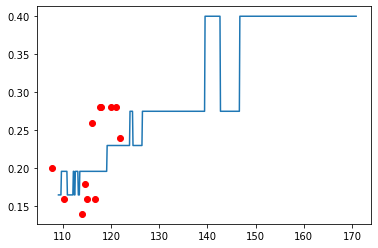

In [127]:
f22linear=interp1d(arrayreal[3],arrayreal[2],kind="linear",)
f22cubic=interp1d(arrayreal[3],arrayreal[2],kind="cubic",)
f22nearest=interp1d(arrayreal[3],arrayreal[2],kind="nearest",)

plt.plot(xnuevo,f22nearest(xnuevo))

charsT=np.transpose(chars)
rads=realradius2(chars)

print(np.shape(rads[0]),np.shape(charsT))
print(charsT)
plt.scatter(charsT[3],charsT[2]/50,c="red")
#plt.scatter(charsT[3],rads[0][2],c="red")


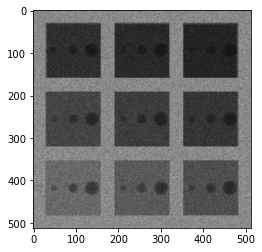

In [128]:
OXAL=importimagemhd("lastsims/HA/Dosis-NbOfHits.mhd")

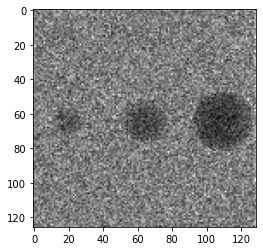

In [129]:
plt.imshow(OXAL[353:479,353:482],cmap="gray")

In [130]:
def matrixextractMULT(img):
    reg9=img[32:160,32:160]
    reg8=img[32:160,192:320]
    reg7=img[32:160,353:482]
    reg6=img[192:320,32:160]
    reg5=img[192:320,192:320]
    reg4=img[192:320,353:482]
    reg3=img[353:482,32:160]
    reg2=img[353:482,192:320]
    reg1=img[353:482,353:482]
    regions=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]
    intensities=[integral(i) for i in regions]
    return intensities

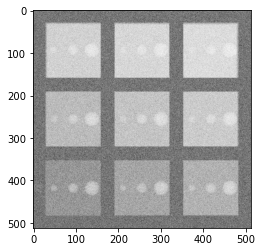

In [131]:
negOXAL=negative(OXAL)
smoothedOXAL=smooth(negOXAL)
thldOXAL=threshold(negOXAL,200)
plt.imshow(negOXAL,cmap="gray")

In [133]:
OXALINTS=matrixextractMULT(negOXAL)

In [134]:
def Sectors(img):
    reg9=img[32:160,32:160]
    reg8=img[32:160,192:320]
    reg7=img[32:160,353:482]
    reg6=img[192:320,32:160]
    reg5=img[192:320,192:320]
    reg4=img[192:320,353:482]
    reg3=img[353:482,32:160]
    reg2=img[353:482,192:320]
    reg1=img[353:482,353:482]
    return [reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]

In [135]:
sc=Sectors(smoothedOXAL)

def reiter2(fig,n):
    newfig=np.copy(fig)
    for i in range(n):
        newfig=recolor(newfig,12,2)
    return newfig


def process2(img, intensity):
    newneg=negative(img)
    newsmoothed=smooth(img)
    newthld=threshold(newsmoothed,intensity)
    reit=reiter2(newthld,3)
    newedges=edges(reit)
    return newedges


def balancedIntegrals(avgs, imgs,tol=0):
    allimgs=[]
    for i in range(len(avgs)):
        allimgs.append(process2(imgs[i],avgs[i]+tol))
    return allimgs



In [559]:
totalOX=balancedIntegrals(OXALINTS,sc,6)

129 129
129 129
129 129
128 129
128 129
128 129
128 129
128 129
128 129
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128


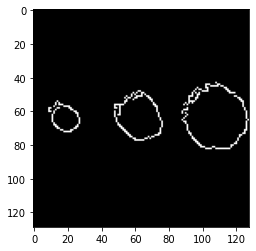

In [567]:
plt.imshow(totalOX[1],cmap="gray")

In [138]:
circlemodel(totalOX[1],sc[1],prop=1,k=30,p1=10,p2=15,minrad=2,maxrad=25)

[[[108.5  63.5  17.2]
  [ 18.5  63.5   8.1]
  [ 62.5  59.5  15.5]]]


array([[[108,  64,  17],
        [ 18,  64,   8],
        [ 62,  60,  16]]], dtype=uint16)

In [182]:
import time
def allcircs(edges,ogs):
    feats=[]
    for i in range(len(edges)):
        actfeat=circlemodel(edges[i],ogs[i],prop=1,k=30,p1=10,p2=11,minrad=2,maxrad=20)
        time.sleep(1)
        feats.append(actfeat)
    return feats


In [183]:
OXALcircs=allcircs(totalOX,sc)

[[[108.5  62.5  18.3]
  [ 63.5  64.5  13.4]
  [ 20.5  64.5   8.2]]]
[[[106.5  63.5  19.4]
  [ 63.5  64.5  12.5]
  [ 18.5  63.5   8.1]]]
[[[105.5  63.5  19.4]
  [ 61.5  63.5  13.4]
  [ 15.5  64.5   6.6]]]
[[[108.5  62.5  17.2]
  [ 64.5  62.5  10.6]
  [ 17.5  63.5   8.2]]]
[[[106.5  63.5  17.2]
  [ 64.5  62.5  11.8]
  [ 16.5  60.5   7.3]]]
[[[103.5  62.5  17.2]
  [ 62.5  63.5  11. ]
  [ 16.5  60.5   8.2]]]
[[[105.5  61.5  17.2]
  [ 66.5  63.5   9.6]
  [ 19.5  62.5   7.1]]]
[[[107.5  59.5  17.2]
  [ 62.5  60.5  11. ]
  [ 21.5  63.5   4.6]]]
[[[104.5  60.5  17.2]
  [ 62.5  58.5  13.6]
  [ 17.5  60.5   5.5]]]


In [575]:
def get_mic_int(fig,n,circles):
    intens=[]
    for i in circles:
        dots=[]
        x,y,r=i[0],i[1],i[2]
        rad=int(i[2])
        #print(x,y)
        for k in range(-n,n+1):
            for l in range(-n,n+1):
                q11=[x+l,y+k]
                #print(k,l)
                #q12=[x-k,y+l]
                #print(q11)
                dots.append(fig[q11[1]][q11[0]])
                #dots.append(fig[q12[0]][q12[1]])
                #dots.append(fig[q21[0]][q21[1]])
                #dots.append(fig[q22[0]][q22[1]])
        mean=np.sum(dots)/len(dots)
        intens.append([x,y,r,mean])
    return np.asarray(intens)


prof_usadas=[12,8,4,24,20,16,36,32,28]



def get_all_mic(fig,n,circles):
    arrayintens=[]
    for i in range(len(circles)):
        #print(i)
        figactual=fig[i]
        circsactual=circles[i]
        #print(len(circles),len(figactual))
        for j in range(len(circsactual[0])):
            #print(j)
            dots=[]
            x,y,r=circsactual[0][j][0],circsactual[0][j][1],circsactual[0][j][2]
            #rad=int(i[2])
            #print(x,y)
            for k in range(-n,n+1):
                for l in range(-n,n+1):
                    q11=[x+l,y+k]
                    dots.append(figactual[q11[1]][q11[0]])
            mean=np.sum(dots)/len(dots)
            arrayintens.append([x,y,r,mean,prof_usadas[i]])
    return np.asarray(arrayintens)

In [576]:
intens=get_all_mic(sc,10,OXALcircs)

In [577]:
print(intens)

[[108.          62.          18.         210.68565209  12.        ]
 [ 64.          64.          13.         197.28990648  12.        ]
 [ 20.          64.           8.         184.14467347  12.        ]
 [106.          64.          19.         204.03420067   8.        ]
 [ 64.          64.          12.         186.45238637   8.        ]
 [ 18.          64.           8.         172.86053077   8.        ]
 [106.          64.          19.         197.03320437   4.        ]
 [ 62.          64.          13.         178.00173982   4.        ]
 [ 16.          64.           7.         159.12077828   4.        ]
 [108.          62.          17.         224.22343084  24.        ]
 [ 64.          62.          11.         214.15503977  24.        ]
 [ 18.          64.           8.         206.99181295  24.        ]
 [106.          64.          17.         219.76925829  20.        ]
 [ 64.          62.          12.         210.13967146  20.        ]
 [ 16.          60.           7.         199.723

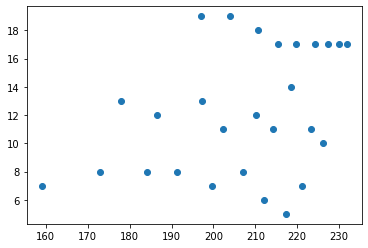

In [578]:
intensT=np.transpose(intens)
plt.scatter(intensT[3],intensT[2])
def group(array):
    g1,g2,g3=[],[],[]
    rads=np.transpose(array)[2]
    for i in range(len(rads)):
        if rads[i]<= 9:
            g1.append(array[i])
        if rads[i]>=10 and rads[i]<=15:
            g2.append(array[i])
        if rads[i]>=16:
            g3.append(array[i])
    return [np.transpose(g1),np.transpose(g2),np.transpose(g3)]


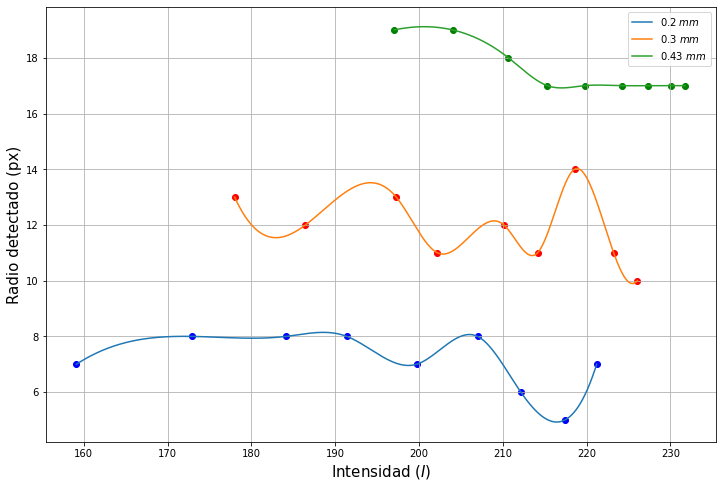

In [579]:
grupos=group(intens)
#print(grupos)
plt.figure(figsize=(12,8))
plt.scatter(grupos[0][3],grupos[0][2],c="blue")
#plt.plot(grupos[0][3],grupos[0][2],c="blue")
plt.scatter(grupos[1][3],grupos[1][2],c="red")
#plt.plot(grupos[1][3],grupos[1][2],c="red")
plt.scatter(grupos[2][3],grupos[2][2],c="green")
#plt.plot(grupos[2][3],grupos[2][2],c="green")
#f1linear=
sec1step=interp1d(grupos[0][3],grupos[0][2],kind="nearest",)
sec2step=interp1d(grupos[1][3],grupos[1][2],kind="nearest",)
sec3step=interp1d(grupos[2][3],grupos[2][2],kind="nearest",)
sec1linear=interp1d(grupos[0][3],grupos[0][2],kind="linear",)
sec2linear=interp1d(grupos[1][3],grupos[1][2],kind="linear",)
sec3linear=interp1d(grupos[2][3],grupos[2][2],kind="linear",)
sec1cubic=interp1d(grupos[0][3],grupos[0][2],kind="cubic",)
sec2cubic=interp1d(grupos[1][3],grupos[1][2],kind="cubic",)
sec3cubic=interp1d(grupos[2][3],grupos[2][2],kind="cubic",)
x1=np.linspace(np.min(grupos[0][3]),np.max(grupos[0][3]),1000)
x2=np.linspace(np.min(grupos[1][3]),np.max(grupos[1][3]),1000)
x3=np.linspace(np.min(grupos[2][3]),np.max(grupos[2][3]),1000)
#plt.plot(x1,sec1linear(x1))
#plt.plot(x2,sec2linear(x2))
#plt.plot(x3,sec3linear(x3))
#plt.plot(x1,sec1step(x1))
#plt.plot(x2,sec2step(x2))
#plt.plot(x3,sec3step(x3))
plt.plot(x1,sec1cubic(x1),label="0.2 $mm$")
plt.plot(x2,sec2cubic(x2),label="0.3 $mm$")
plt.plot(x3,sec3cubic(x3),label="0.43 $mm$")
plt.grid()
plt.xlabel("Intensidad $(I)$",fontsize=15)
plt.ylabel("Radio detectado (px)",fontsize=15)
plt.legend()

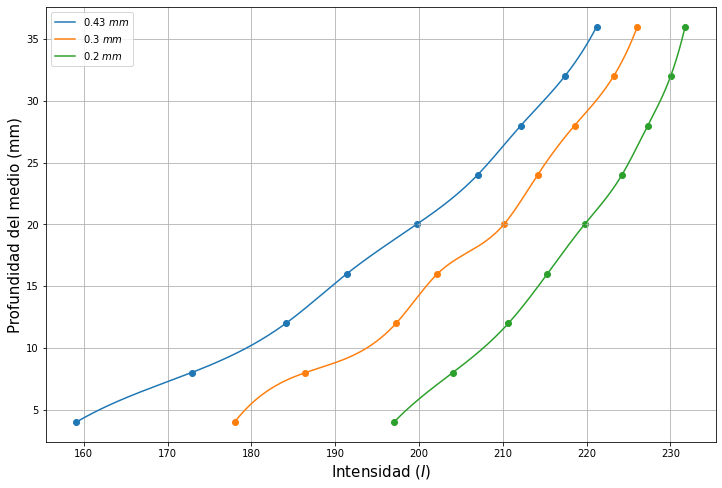

In [580]:
plt.figure(figsize=(12,8))
plt.scatter(grupos[0][3],grupos[0][4])
plt.scatter(grupos[1][3],grupos[1][4])
plt.scatter(grupos[2][3],grupos[2][4])
prof1step=interp1d(grupos[0][3],grupos[0][4],kind="nearest",)
prof2step=interp1d(grupos[1][3],grupos[1][4],kind="nearest",)
prof3step=interp1d(grupos[2][3],grupos[2][4],kind="nearest",)
prof1linear=interp1d(grupos[0][3],grupos[0][4],kind="linear",)
prof2linear=interp1d(grupos[1][3],grupos[1][4],kind="linear",)
prof3linear=interp1d(grupos[2][3],grupos[2][4],kind="linear",)
prof1cubic=interp1d(grupos[0][3],grupos[0][4],kind="cubic",)
prof2cubic=interp1d(grupos[1][3],grupos[1][4],kind="cubic",)
prof3cubic=interp1d(grupos[2][3],grupos[2][4],kind="cubic",)

#plt.plot(x1,prof1step(x1))
#plt.plot(x2,prof2step(x2))
#plt.plot(x3,prof3step(x3))
plt.plot(x1,prof1cubic(x1),label="0.43 $mm$")
plt.plot(x2,prof2cubic(x2),label="0.3 $mm$")
plt.plot(x3,prof3cubic(x3),label="0.2 $mm$")
plt.grid()
plt.xlabel("Intensidad $(I)$",fontsize=15)
plt.ylabel("Profundidad del medio (mm)",fontsize=15)
plt.legend()

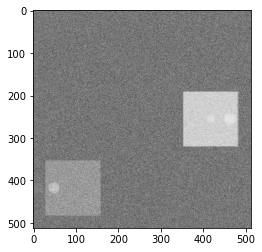

In [510]:
OXALT=importimagemhd("lastsims/TEST/Dosis-NbOfHits.mhd")
negOXALT=negative(OXALT)
smoothedOXALT=smooth(negOXALT)
thldOXALT=threshold(negOXALT,200)
plt.imshow(negOXALT,cmap="gray")
scT=Sectors(smoothedOXALT)


In [511]:
OXALINTST=matrixextractMULT(negOXALT)
totalOXT=balancedIntegrals(OXALINTST,scT,4)

129 129
129 129
129 129
128 129
128 129
128 129
128 129
128 129
128 129
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128


[[[16.5 63.5 16.6]
  [55.5 76.5 27. ]]]
[[[105.5  62.5  17.2]
  [ 62.5  60.5  10.5]]]


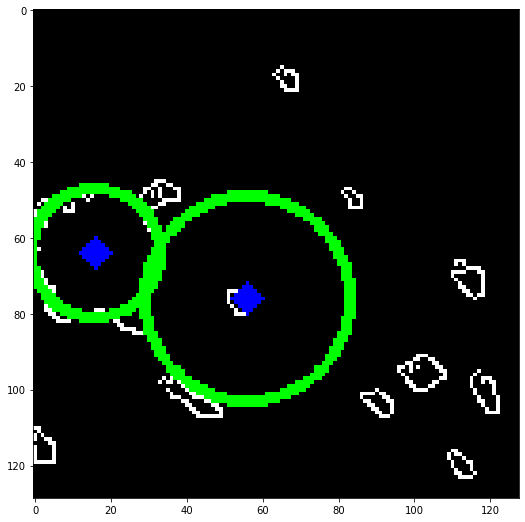

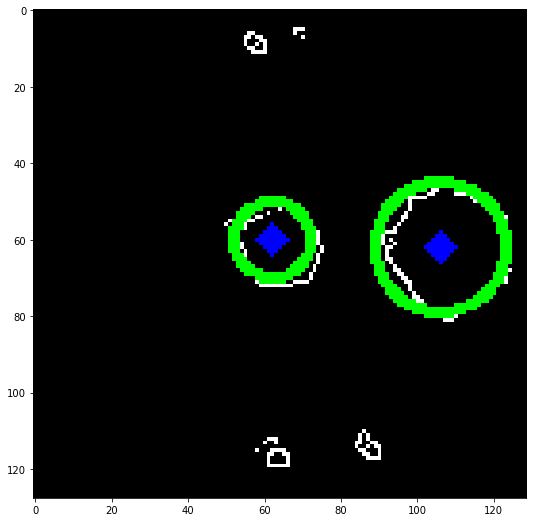

In [513]:
OXALcircs1=[ circlemodel(totalOXT[i],scT[i],prop=0.5,k=30,p1=10,p2=10,minrad=9,maxrad=50) for i in range(2,4)]

In [400]:
intensT=get_all_mic(scT[2:4],8,OXALcircs1)

In [402]:

np.transpose(intensT)[4]=[4,24,24]
print(np.transpose(intensT))

[[ 14.         108.          64.        ]
 [ 66.          62.          64.        ]
 [ 17.          16.          10.        ]
 [156.52408997 226.32570002 212.84092997]
 [  4.          24.          24.        ]]


178.00173981746102


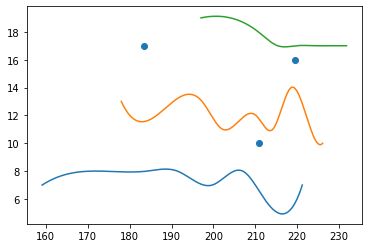

In [195]:
plt.plot(x1,sec1cubic(x1))
plt.plot(x2,sec2cubic(x2))
plt.plot(x3,sec3cubic(x3))
print(min(x2))
plt.scatter(np.transpose(intensT)[3],np.transpose(intensT)[2])

In [196]:
def RSS(dots,func):
    allrss=[]
    for i in range(len(dots)):
        group=[]
        for j in range(len(func)):
            #print(func[i])
            try:
                RSS=(dots[i][2]-func[j](dots[i][3]))**2
            except:
                RSS=999
            group.append(RSS)
        allrss.append(min(group))
    return np.sum(allrss)
        
            

In [197]:
print(RSS(intensT,[sec1step,sec1step,sec1step]))

print(RSS(intensT,[sec1linear,sec2linear,sec3linear]))

print(RSS(intensT,[sec1cubic,sec2cubic,sec3cubic]))

178.0
25.869490546905514
33.628239184607445


In [198]:
def triInt(dots):
    newdot=dots
    #print(newdot)
    #newdot.append([720,720,integral(fig)])
    #newdot.append([720,0,integral(fig)])
    #newdot.append([0,720,integral(fig)])
    #newdot.append([0,0,integral(fig)])
    x,y,z=newdot[4],newdot[2],newdot[3]
    print(len(x),len(y),len(z))
    rang=np.linspace(min(x),max(x))
    dom=np.linspace(min(y),max(y))
    X,Y=np.meshgrid(rang,dom)
    interp=si.LinearNDInterpolator(list(zip(x, y)), z)
    Z = interp(X, Y)
    plt.pcolormesh(X,Y,Z,shading="auto")
    plt.plot(x, y, "ok", label="input point",)
    plt.legend()
    plt.colorbar()
    #plt.axis("equal")
    plt.ylim(np.min(y)-2,np.max(y)+2)
    plt.xlim(np.min(x)-2,np.max(x)+2)
    return interp


9 9 9


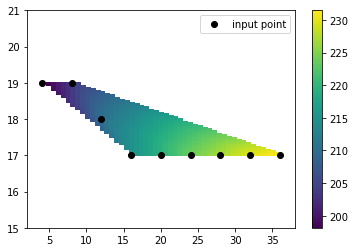

In [199]:
triInt(grupos[2])

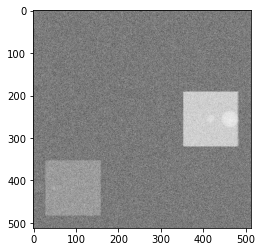

In [515]:
OXALT=importimagemhd("lastsims/TEST2/Dosis-NbOfHits.mhd")
negOXALT=negative(OXALT)
smoothedOXALT=smooth(negOXALT)
thldOXALT=threshold(negOXALT,200)
plt.imshow(negOXALT,cmap="gray")
scT=Sectors(smoothedOXALT)



129 129
129 129
129 129
128 129
128 129
128 129
128 129
128 129
128 129
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128
[[[18.5 61.5  9.1]]]
[[[106.5  58.5  19.4]
  [ 63.5  62.5   9.6]]]


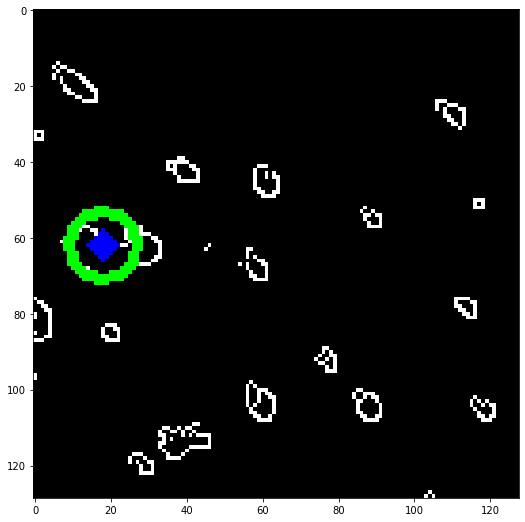

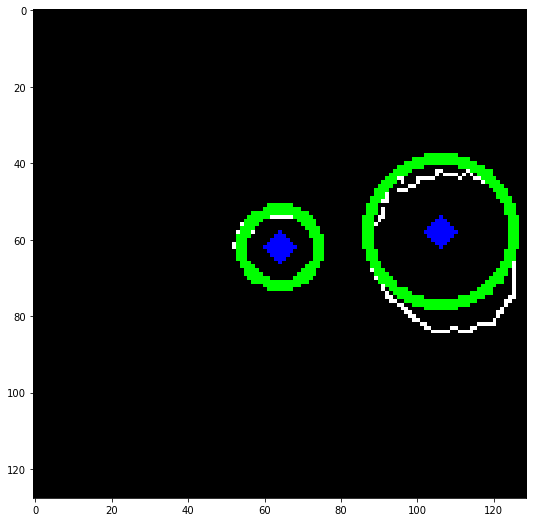

In [529]:
OXALINTST=matrixextractMULT(negOXALT)
totalOXT=balancedIntegrals(OXALINTST,scT,5)

OXALcircs2=[ circlemodel(totalOXT[i],scT[i],prop=1,k=30,p1=10,p2=15,minrad=3,maxrad=27) for i in range(2,4)]

[[ 18.          62.           9.         163.15528402   4.        ]
 [106.          58.          19.         224.3608717   24.        ]
 [ 64.          62.          10.         216.73183077  24.        ]]
178.00173981746102


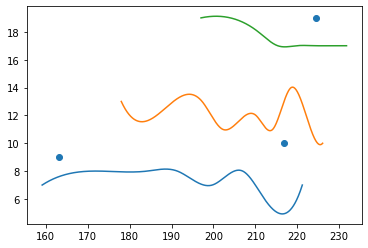

In [541]:
intensT2=get_all_mic(scT[2:4],2,OXALcircs2)
np.transpose(intensT2)[4]=[4,24,24]
print(intensT2)
plt.plot(x1,sec1cubic(x1))
plt.plot(x2,sec2cubic(x2))
plt.plot(x3,sec3cubic(x3))
print(min(x2))
plt.scatter(np.transpose(intensT2)[3],np.transpose(intensT2)[2])

In [542]:
print(RSS(intensT2,[sec1step,sec2step,sec3step]))

print(RSS(intensT2,[sec1linear,sec2linear,sec3linear]))

print(RSS(intensT2,[sec1cubic,sec2cubic,sec3cubic]))

24.0
14.478423178666763
14.369064862531907


In [543]:
intensT3=np.transpose(get_mic_int(mics2,1,retrieve[0]))
intensT3[2]=intensT3[2]*0.9
intensT3[3]=intensT3[3]*1.8

178.00173981746102


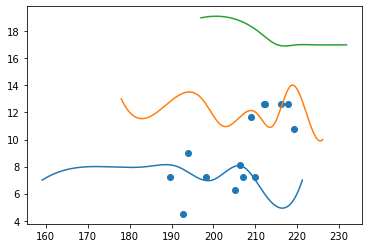

In [544]:
#print(np.transpose(intensT3))
plt.plot(x1,sec1cubic(x1))
plt.plot(x2,sec2cubic(x2))
plt.plot(x3,sec3cubic(x3))
print(min(x2))
plt.scatter(intensT3[3],intensT3[2])

In [545]:
def triIntM(dots):
    newdot=dots
    
    #print(newdot)
    for i in dots:
        #newdot.append([720,720,integral(fig)])
        #newdot.append([720,0,integral(fig)])
        #newdot.append([0,720,integral(fig)])
        #newdot.append([0,0,integral(fig)])
        x,y,z=i[4],i[2],i[3]
        print(len(x),len(y),len(z))
        rang=np.linspace(min(x),max(x))
        dom=np.linspace(min(y),max(y))
        X,Y=np.meshgrid(rang,dom)
        interp=si.LinearNDInterpolator(list(zip(x, y)), z)
        Z = interp(X, Y)
        plt.pcolormesh(X,Y,Z,shading="auto")
        plt.plot(x, y, "ok", label="input point",)
    plt.legend()
    plt.colorbar()
    return interp
    #plt.axis("equal")
    #plt.ylim(np.min(y)-2,np.max(y)+2)
    #plt.xlim(np.min(x)-2,np.max(x)+2)

27 27 27


array(217.03096669)

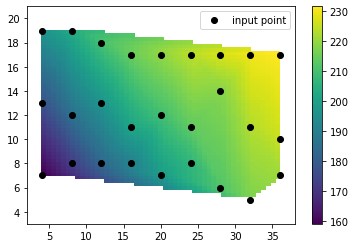

In [546]:
unc=triInt(np.concatenate((grupos[0],grupos[1],grupos[2]),axis=1))
unc(21,15)

In [547]:
def triRSS(dots,func):
    group=[]
    for i in range(len(dots)):
        try:
            RSS=(dots[i][3]-func(dots[i][2],dots[i][4]))**2
        except:
            RSS=999
        group.append(RSS)
    return group


In [548]:
triRSS(np.transpose(intensT2),unc)

[999, 999, 999, 999, 999]

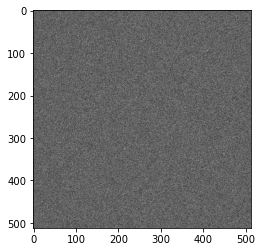

In [549]:
FF=importimagemhd("lastsims/FlatField/Dosis-NbOfHits.mhd")


In [550]:
newOXAL=OXALT/FF

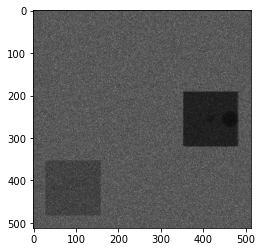

In [551]:
plt.imshow(newOXAL,cmap="gray")

In [581]:
from mpl_toolkits.mplot3d import axes3d
import scipy as sp
import scipy.interpolate

allmic=np.concatenate((grupos[0],grupos[1],grupos[2]),axis=1)
print(allmic)
x=allmic[2]
y=allmic[4]
z=allmic[3]


[[ 20.          18.          16.          18.          16.
   16.          20.          22.          18.          64.
   64.          62.          64.          64.          62.
   66.          62.          62.         108.         106.
  106.         108.         106.         104.         106.
  108.         104.        ]
 [ 64.          64.          64.          64.          60.
   60.          62.          64.          60.          64.
   64.          64.          62.          62.          64.
   64.          60.          58.          62.          64.
   64.          62.          64.          62.          62.
   60.          60.        ]
 [  8.           8.           7.           8.           7.
    8.           7.           5.           6.          13.
   12.          13.          11.          12.          11.
   10.          11.          14.          18.          19.
   19.          17.          17.          17.          17.
   17.          17.        ]
 [184.14467347 172.86053077 

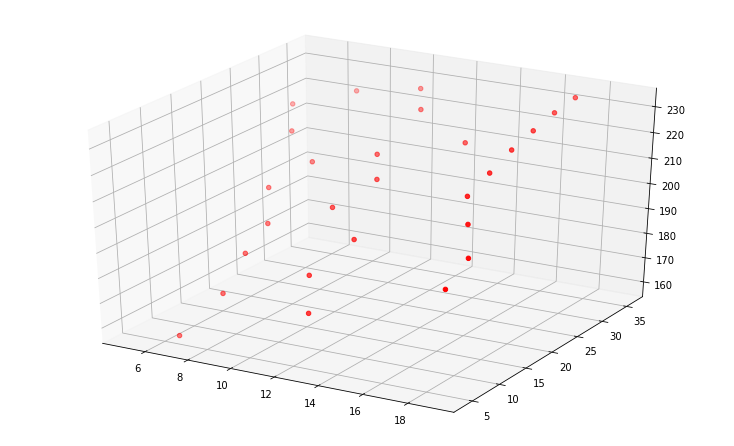

In [582]:
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.scatter3D(x,y,z, c='r')

Text(0.5, 0, '$I$')

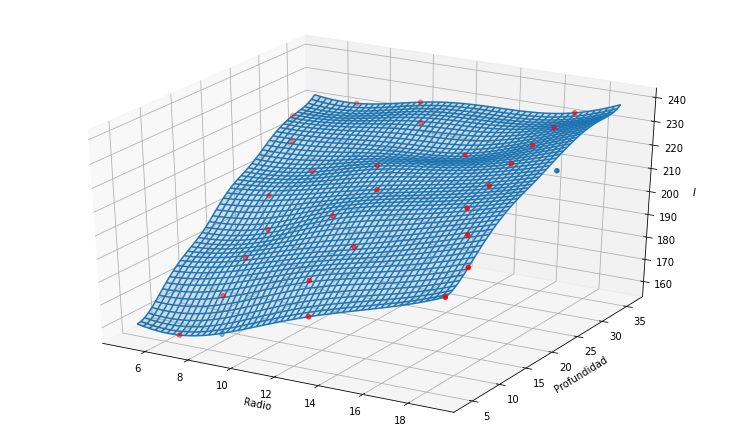

In [604]:
import scipy as sp
import scipy.interpolate
multspline = sp.interpolate.Rbf(x,y,z)

xgrid=np.linspace(np.min(x),np.max(x),1000)
ygrid=np.linspace(np.min(y),np.max(y),1000)
B1,B2 = np.meshgrid(xgrid,ygrid,indexing="xy")

Z = np.zeros((x.size, z.size))

Z = multspline(B1,B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')
ax.scatter(np.transpose(intensT2)[2],np.transpose(intensT2)[4],np.transpose(intensT2)[3])
#ax.scatter3D(np.transpose(intensT2)[2],np.transpose(intensT2)[4],np.transpose(intensT2)[3])
ax.set_xlabel("Radio")
ax.set_ylabel("Profundidad")
ax.set_zlabel("$I$")

#for i in range(0,360,1):
 #       ax.view_init(elev=10., azim=i)
  #      plt.savefig("ANIM/movie%d.png" % i)

Text(0, 0.5, 'Profundidad')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


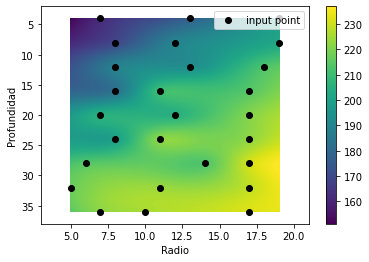

In [555]:
plt.pcolormesh(B1,B2,Z,shading="auto")
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.xlim(min(x)-2,max(x)+2)
plt.ylim(max(y)+2,min(y)-2)
plt.xlabel("Radio")
plt.ylabel("Profundidad")

In [584]:
def triRSS(dots,func):
    group=[]
    for i in range(len(dots[3])):
        try:
            RSS=(dots[3][i]-func(dots[2][i],dots[4][i]))**2
        except:
            RSS=999
        group.append(RSS)
    return np.sum(group)

In [585]:
triRSS(allmic,multspline)

1.7690679116124322e-25

In [377]:
intensT3

array([[496.        , 476.        , 452.        , 498.        ,
        464.        , 436.        , 540.        , 506.        ,
        276.        , 568.        , 256.        , 518.        ],
       [ 78.        , 138.        , 258.        , 332.        ,
        198.        , 310.        , 170.        , 278.        ,
         62.        ,  90.        , 124.        , 226.        ],
       [ 12.6       ,  12.6       ,  12.6       ,  10.8       ,
         12.6       ,  11.7       ,   7.2       ,   7.2       ,
          7.2       ,   8.1       ,   9.        ,   6.3       ],
       [211.96923828, 216.07963867, 217.88603516, 219.30698242,
        212.21577148, 209.06015625, 209.91630859, 207.14616699,
        198.32026367, 206.37966309, 193.89611816, 205.25458984]])

In [393]:
def findclosestdepth(rad,intens):
    tol=1.6
    for i in range(0,100):
        if spline(rad,i)>= intens-tol and spline(rad,i)<= intens+tol:
            return i
    return -1

In [394]:
for j in np.transpose(intensT3):
    print(findclosestdepth(j[2],j[3]))
    

16
22
23
25
16
15
27
20
23
20
17
26


In [539]:
mean=np.mean([findclosestdepth(j[2],j[3]) for j in np.transpose(intensT3)])

In [540]:

np.transpose(intensT2)[4]=[4,24,24]
intensT2

array([[ 18.        ,  62.        ,   9.        , 163.15528402,
          4.        ],
       [106.        ,  58.        ,  19.        , 224.3608717 ,
         24.        ],
       [ 64.        ,  62.        ,  10.        , 216.73183077,
         24.        ]])

In [441]:
triRSS(np.transpose(intensT2),multspline)

86.02422500375081

Text(0, 0.5, 'TPR')

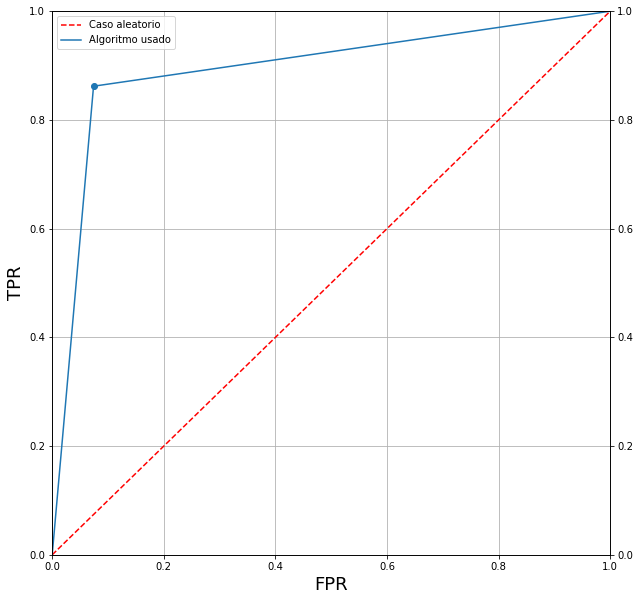

In [469]:

fig, ax = plt.subplots(figsize= (10,10))

ax2 = ax.twinx()
ax.grid()
ax.plot([0,1],[0,1],color="red",linestyle="--",label="Caso aleatorio")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.plot([0,1-0.9259,1],[0,0.8620,1],label="Algoritmo usado")
ax.scatter([1-0.9259],[0.8620])
ax.legend()
ax.set_xlabel("FPR",fontsize=18)
ax.set_ylabel("TPR",fontsize=18)

In [474]:
import scipy.integrate 

AUC=np.trapz([0,0.8620,1], [0,1-0.9259,1], dx=0.00001)

In [475]:
AUC

0.89395

In [478]:
(187.38977072+186.11552028+185.74074074+189.03880071+187.76455026+189.18871252)/6-(179.65432099+186.67901235+176.02469136+176.83950617+174.39506173+181.95061728)/6

8.282480891666665

In [477]:
(179.65432099+186.67901235+176.02469136+176.83950617+174.39506173+181.95061728)/6

179.25720164666666

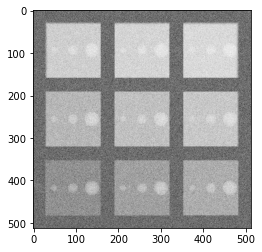

In [558]:
HA=importimagemhd("lastsims/OX/Dosis-NbOfHits.mhd")
negHA=negative(HA)
smoothedHA=smooth(negHA)
thldHA=threshold(negHA,200)
plt.imshow(negHA,cmap="gray")

In [565]:
HAINTS=matrixextractMULT(negHA)
scHA=Sectors(smoothedHA)
totalHA=balancedIntegrals(HAINTS,scHA,7)

129 129
129 129
129 129
128 129
128 129
128 129
128 129
128 129
128 129
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128
129 128
129 128
129 128
128 128
128 128
128 128
128 128
128 128
128 128


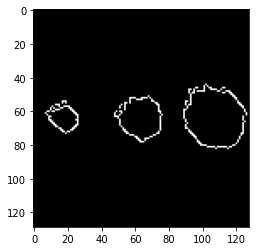

In [566]:
plt.imshow(totalHA[1],cmap="gray")

[[[105.5  64.5  19.4]
  [ 64.5  65.5  12.5]
  [ 20.5  64.5   7.3]]]
[[[107.5  63.5  17.2]
  [ 62.5  65.5  12.5]
  [ 18.5  61.5   8.2]]]
[[[105.5  63.5  19.4]
  [ 59.5  63.5  12.5]
  [ 14.5  63.5   8. ]]]
[[[109.5  62.5  17.2]
  [ 63.5  61.5  12.5]
  [ 18.5  63.5   5. ]]]
[[[107.5  64.5  17.2]
  [ 61.5  62.5  11.6]
  [ 19.5  61.5   7.4]]]
[[[105.5  63.5  17.2]
  [ 59.5  63.5  13.2]
  [ 17.5  62.5   8.2]]]
[[[107.5  61.5  16. ]
  [ 64.5  59.5  10.5]
  [ 17.5  61.5   6.9]]]
[[[108.5  63.5  16. ]
  [ 63.5  61.5  10.9]
  [ 18.5  61.5   5. ]]]
[[[106.5  61.5  17.2]
  [ 61.5  61.5   9.6]
  [ 17.5  62.5   6. ]]]


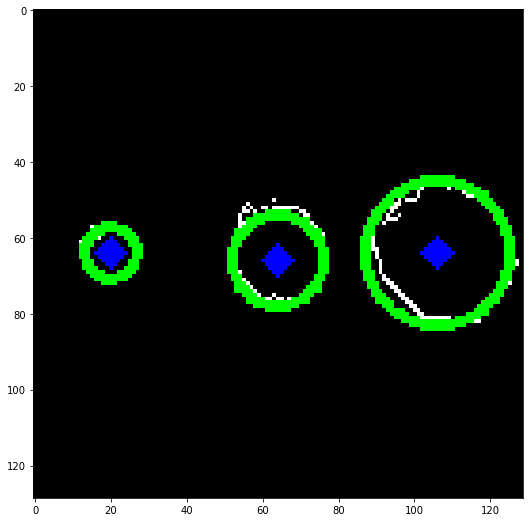

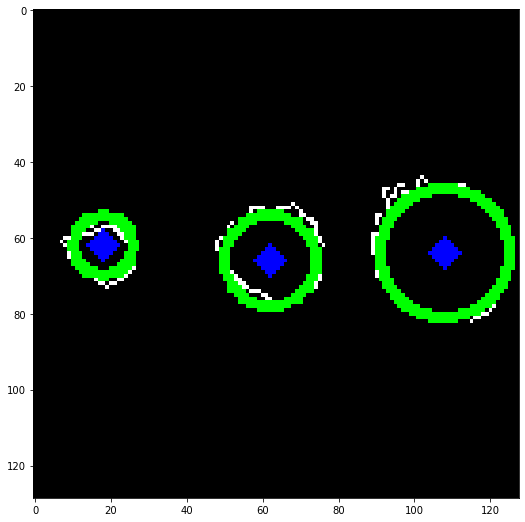

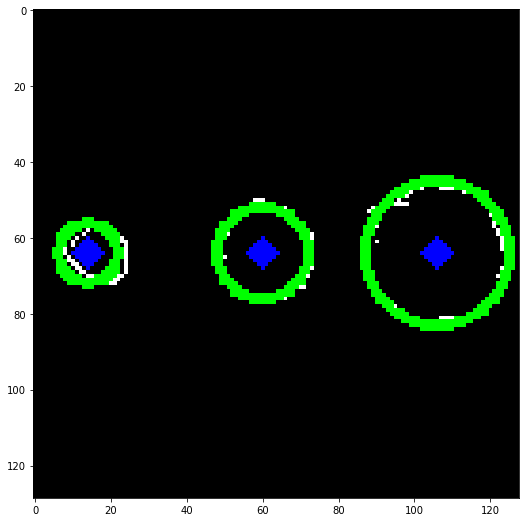

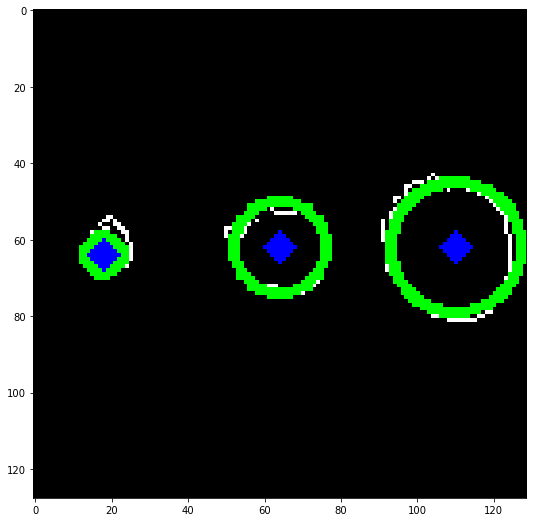

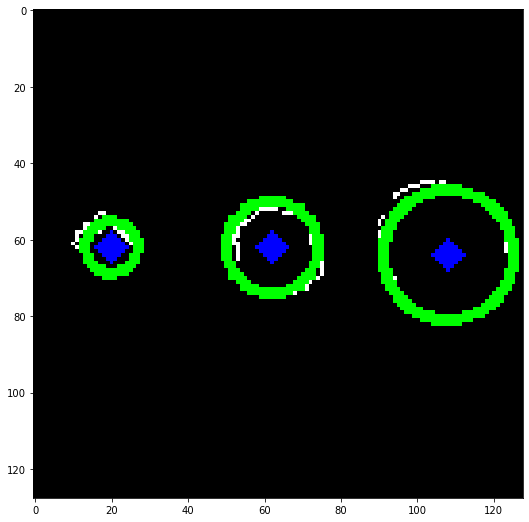

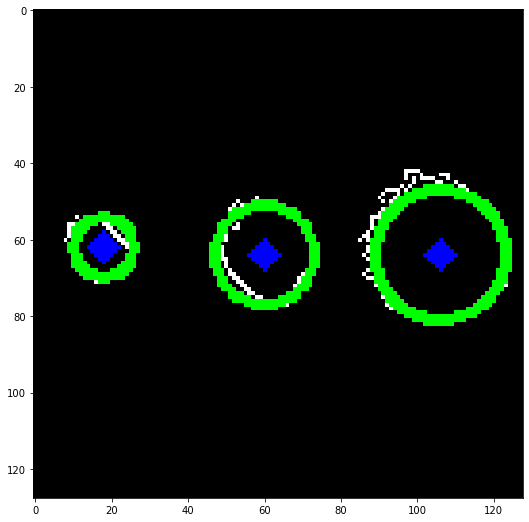

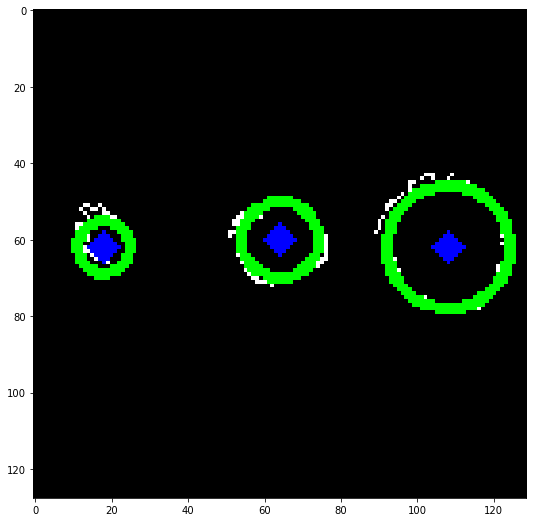

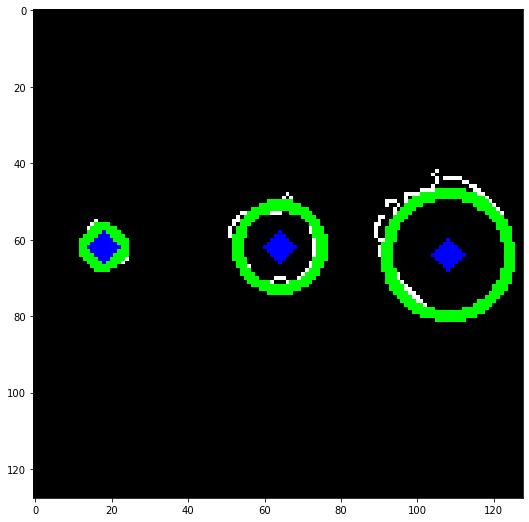

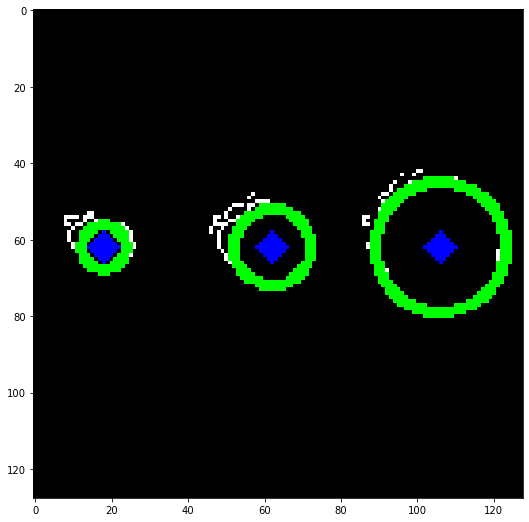

In [568]:
HAcircs=allcircs(totalHA,scHA)

In [569]:
intensHA=get_all_mic(sc,10,HAcircs)

In [570]:
print(intensHA)

[[106.          64.          19.         210.76220665  12.        ]
 [ 64.          66.          12.         197.14233535  12.        ]
 [ 20.          64.           7.         184.14467347  12.        ]
 [108.          64.          17.         204.69875944   8.        ]
 [ 62.          66.          12.         186.03443102   8.        ]
 [ 18.          62.           8.         172.54877453   8.        ]
 [106.          64.          19.         197.03320437   4.        ]
 [ 60.          64.          12.         177.19286755   4.        ]
 [ 14.          64.           8.         159.21068917   4.        ]
 [110.          62.          17.         224.33223605  24.        ]
 [ 64.          62.          12.         214.15503977  24.        ]
 [ 18.          64.           5.         206.99181295  24.        ]
 [108.          64.          17.         220.05658222  20.        ]
 [ 62.          62.          12.         210.02826013  20.        ]
 [ 20.          62.           7.         199.593

Text(0.5, 0, '$I$')

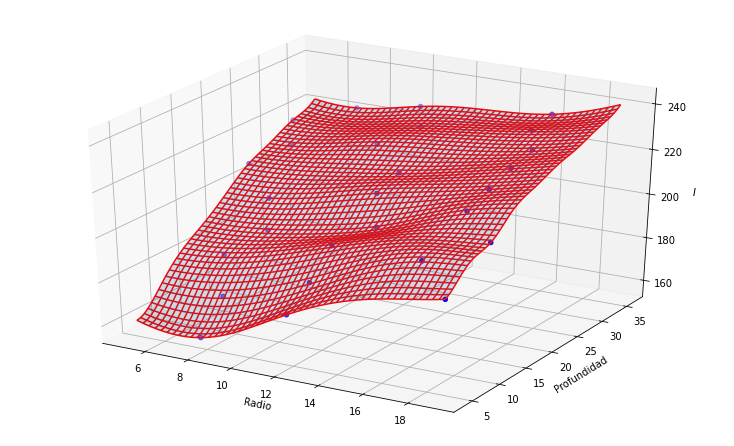

In [605]:
a=np.transpose(intensHA)[2]
b=np.transpose(intensHA)[4]
c=np.transpose(intensHA)[3]
multsplineHA = sp.interpolate.Rbf(a,b,c)

agrid=np.linspace(np.min(a),np.max(a),1000)
bgrid=np.linspace(np.min(b),np.max(b),1000)
G1,G2 = np.meshgrid(agrid,bgrid,indexing="xy")

C = np.zeros((c.size, c.size))

C = multsplineHA(G1,G2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(G1, G2, C,color="red")
ax.plot_surface(G1, G2, C,alpha=0.2)
#ax.plot_wireframe(B1, B2, C,color="green")
#ax.plot_surface(B1, B2, C,alpha=0.2)
ax.scatter3D(a,b,c, c='blue')
#ax.scatter3D(x,y,z, c='green')
#ax.scatter(np.transpose(intensT2)[2],np.transpose(intensT2)[4],np.transpose(intensT2)[3])
#ax.scatter3D(np.transpose(intensT2)[2],np.transpose(intensT2)[4],np.transpose(intensT2)[3])
ax.set_xlabel("Radio")
ax.set_ylabel("Profundidad")
ax.set_zlabel("$I$")

#for i in range(0,360,1):
 #       ax.view_init(elev=10., azim=i)
  #      plt.savefig("ANIM/movie%d.png" % i)

Text(0, 0.5, 'Profundidad')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


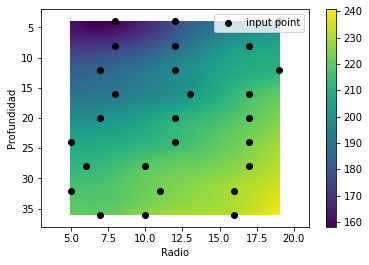

In [606]:
plt.pcolormesh(G1,G2,C,shading="auto")
plt.plot(a, b, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.xlim(min(a)-2,max(a)+2)
plt.ylim(max(b)+2,min(b)-2)
plt.xlabel("Radio")
plt.ylabel("Profundidad")

In [607]:
intensT2

array([[ 18.        ,  62.        ,   9.        , 163.15528402,
          4.        ],
       [106.        ,  58.        ,  19.        , 224.3608717 ,
         24.        ],
       [ 64.        ,  62.        ,  10.        , 216.73183077,
         24.        ]])

In [611]:

print(multspline(intensT2[0][2],intensT2[0][4]))

163.52611993307931


In [612]:
print(multspline(intensT2[1][2],intensT2[1][4]))

229.94228472890063


In [613]:
print(multspline(intensT2[2][2],intensT2[2][4]))

211.90688854970637
